Date - 19 May 2022

Project by - Anirudh Agarwal

Cohort - August 2021

# Capstone Project

## Real Estate

### DESCRIPTION

A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 

The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.

A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.

The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

    Variables              Description

**Second mortgage**	--> Households with a second mortgage statistics

**Home equity**	--> Households with a home equity loan statistics

**Debt** -->	Households with any type of debt statistics

**Mortgage Costs**	--> Statistics regarding mortgage payments, home equity loans, utilities, and property taxes

**Home Owner Costs** -->	Sum of utilities, and property taxes statistics

**Gross Rent** -->	Contract rent plus the estimated average monthly cost of utility features

**High school Graduation** -->	High school graduation statistics

**Population Demographics** -->	Population demographics statistics

**Age Demographics** -->	Age demographic statistics

**Household Income** -->	Total income of people residing in the household

**Family Income** -->	Total income of people related to the householder

In [1]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
training_dataframe = pd.read_csv("/Users/anirudhagarwal/Library/CloudStorage/OneDrive-Personal/Purdue DS Course/Course 8/Project 1/train.csv")
testing_dataframe = pd.read_csv("/Users/anirudhagarwal/Library/CloudStorage/OneDrive-Personal/Purdue DS Course/Course 8/Project 1/test.csv")

In [3]:
# Importing the data set and keeping the original untouched for reference
train_df = training_dataframe.copy()
test_df = testing_dataframe.copy()

In [4]:
train_df.head() 

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.7496

In [5]:
test_df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,41.948556,-76.783808,258903666,863840,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,1254.54462,1089.0,596.85204,340.45884,552.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,36.746009,-84.766870,501694825,2623067,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,862.65763,749.0,624.42157,299.56752,337.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,27.882462,-97.678586,13796057,497689,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,1996.41425,1907.0,740.21168,319.97570,1102.0,867.57713,804.0,376.20236,642.0,333.91919,0.00000,0.00000,0.03440,0.63188,1.000

In [6]:
# check the number of rows and columns
train_df.shape, test_df.shape

((27321, 80), (11709, 80))

In [7]:
# figuring out the primary key 
# unique values/non-repeating values can be used as primary key and duplicates can be removed


print('Duplicates in training dataset :')
print(train_df.duplicated().value_counts(),'\n')

print('Duplicates in testing dataset :')
print(test_df.duplicated().value_counts(),'\n')


Duplicates in training dataset :
False    27161
True       160
dtype: int64 

Duplicates in testing dataset :
False    11677
True        32
dtype: int64 



In [8]:
# Removing the duplicates from the data set

train_df.drop_duplicates(keep = 'first', inplace=True)
test_df.drop_duplicates(keep = 'first', inplace=True)

In [9]:
# check the number of rows and columns after removing duplicates
train_df.shape, test_df.shape

((27161, 80), (11677, 80))

In [10]:
# unique values/non-repeating values can be used as primary key 

train_df.nunique() == train_df.shape[0]

UID                             True
BLOCKID                        False
SUMLEVEL                       False
COUNTYID                       False
STATEID                        False
state                          False
state_ab                       False
city                           False
place                          False
type                           False
primary                        False
zip_code                       False
area_code                      False
lat                            False
lng                            False
ALand                          False
AWater                         False
pop                            False
male_pop                       False
female_pop                     False
rent_mean                      False
rent_median                    False
rent_stdev                     False
rent_sample_weight             False
rent_samples                   False
rent_gt_10                     False
rent_gt_15                     False
r

In [11]:
test_df.nunique() == test_df.shape[0]

UID                             True
BLOCKID                        False
SUMLEVEL                       False
COUNTYID                       False
STATEID                        False
state                          False
state_ab                       False
city                           False
place                          False
type                           False
primary                        False
zip_code                       False
area_code                      False
lat                            False
lng                             True
ALand                           True
AWater                         False
pop                            False
male_pop                       False
female_pop                     False
rent_mean                      False
rent_median                    False
rent_stdev                     False
rent_sample_weight             False
rent_samples                   False
rent_gt_10                     False
rent_gt_15                     False
r

#### Since the number of unique values of UID matches the number of rows,UID can be used as the primary key in the data set

In [12]:
# checking number of unique values

train_df.nunique()

UID                            27161
BLOCKID                            0
SUMLEVEL                           1
COUNTYID                         296
STATEID                           52
state                             52
state_ab                          52
city                            6916
place                           9912
type                               6
primary                            1
zip_code                       12744
area_code                        274
lat                            27158
lng                            27160
ALand                          27131
AWater                         16488
pop                             7648
male_pop                        4507
female_pop                      4606
rent_mean                      26806
rent_median                     2335
rent_stdev                     26792
rent_sample_weight             26693
rent_samples                    2178
rent_gt_10                      8373
rent_gt_15                     13983
r

In [13]:
# Block ID column has all missing values, and SUMLEVEL and primary each have single value.
# Hence, will remove these 3 features from both the data sets, reducing the number of features from 80 to 77

train_df.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)
test_df.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)

train_df.shape[1], test_df.shape[1]

(77, 77)

In [14]:
# Missing value treatment

train_df.isna().sum()

UID                              0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                      242
rent_median                    242
rent_stdev                     242
rent_sample_weight             242
rent_samples                   242
rent_gt_10                     242
rent_gt_15                     242
rent_gt_20                     242
rent_gt_25                     242
rent_gt_30                     242
rent_gt_35                     242
rent_gt_40          

In [15]:

# Fill rate of the variables

1-(train_df.isna().sum()/len(train_df))

UID                            1.000000
COUNTYID                       1.000000
STATEID                        1.000000
state                          1.000000
state_ab                       1.000000
city                           1.000000
place                          1.000000
type                           1.000000
zip_code                       1.000000
area_code                      1.000000
lat                            1.000000
lng                            1.000000
ALand                          1.000000
AWater                         1.000000
pop                            1.000000
male_pop                       1.000000
female_pop                     1.000000
rent_mean                      0.991090
rent_median                    0.991090
rent_stdev                     0.991090
rent_sample_weight             0.991090
rent_samples                   0.991090
rent_gt_10                     0.991090
rent_gt_15                     0.991090
rent_gt_20                     0.991090


In [16]:
train_df['data_type'] = 'Train'
test_df['data_type'] = 'Test'

In [17]:
# last column is data type 

train_df.head(1)

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.9624,2024.0,67994.1479,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.0153,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.8588,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.0124,0.0877,Train


In [18]:
# last column is data type 

test_df.head(1)

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type
0,255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.0,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.4771,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.9201,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75,21.58531,416.48097,1938.0,0.70252,0.28217,0.0591,0.03813,0.14299,Test


In [19]:
combined_df = train_df.append(test_df, ignore_index=True)

In [20]:
combined_df.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train
2,245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.898

In [21]:
# both data sets are combined and resulting data set has 38,838 observations

combined_df.shape

(38838, 78)

In [22]:
# check percentage of missing values

(combined_df.isna().sum()/len(combined_df))*100

UID                            0.000000
COUNTYID                       0.000000
STATEID                        0.000000
state                          0.000000
state_ab                       0.000000
city                           0.000000
place                          0.000000
type                           0.000000
zip_code                       0.000000
area_code                      0.000000
lat                            0.000000
lng                            0.000000
ALand                          0.000000
AWater                         0.000000
pop                            0.000000
male_pop                       0.000000
female_pop                     0.000000
rent_mean                      0.968124
rent_median                    0.968124
rent_stdev                     0.968124
rent_sample_weight             0.968124
rent_samples                   0.968124
rent_gt_10                     0.970699
rent_gt_15                     0.970699
rent_gt_20                     0.970699


In [23]:
col_check = combined_df.isna().sum().to_frame().reset_index()
col_check

,index,0
0,UID,0
1,COUNTYID,0
2,STATEID,0
3,state,0
4,state_ab,0
5,city,0
6,place,0
7,type,0
8,zip_code,0
9,area_code,0


In [24]:
# columns with null values

null_col = col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [25]:
# filling the missing values with their respective feature's median, because there may be outliers in 
# the data, using mean of the data is not advisable

for i in null_col:
    combined_df[i].fillna(combined_df[i].median(), inplace=True)

In [26]:
combined_df.isna().sum()

# No more missing values

UID                            0
COUNTYID                       0
STATEID                        0
state                          0
state_ab                       0
city                           0
place                          0
type                           0
zip_code                       0
area_code                      0
lat                            0
lng                            0
ALand                          0
AWater                         0
pop                            0
male_pop                       0
female_pop                     0
rent_mean                      0
rent_median                    0
rent_stdev                     0
rent_sample_weight             0
rent_samples                   0
rent_gt_10                     0
rent_gt_15                     0
rent_gt_20                     0
rent_gt_25                     0
rent_gt_30                     0
rent_gt_35                     0
rent_gt_40                     0
rent_gt_50                     0
universe_s

In columns, pop, there are some records for which the value is 0. I am removing all records with population zero as these places are not revelant for our analysis.

In [27]:
print('Number of observations with 0 Population = ', (combined_df['pop']==0).sum())

Number of observations with 0 Population =  216


In [28]:
# As these observations are of no use in analysis, will remove them

combined_df = combined_df.drop(combined_df[combined_df['pop']==0].index).reset_index(drop=True)

In [29]:
print('Number of observations with 0 Population = ', (combined_df['pop']==0).sum())

Number of observations with 0 Population =  0


### Exploratory Data Analysis (EDA)

In [30]:
# Sorting the data in decending order for second mortgage
top_second_mortgage = combined_df.sort_values(by=['second_mortgage'],ascending=False)

In [31]:
top_second_mortgage.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type
35202,248394,163,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.901474,-85.986474,4114191.0,8502,2661,1280,1381,1118.09185,1039.0,272.97314,262.35860,718.0,1.00000,0.93454,0.78552,0.57103,0.49025,0.36351,0.24234,0.11838,796,718,48184.50734,44822.0,24841.69744,578.68043,798.0,50819.49924,46983.0,23710.51317,526.18373,744.0,449.5,449.0,36.51484,2.00000,2.0,477.86919,448.0,198.70117,327.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.96933,0.96314,0.97500,22.84809,24.50000,13.06332,289.82619,1280.0,23.05701,25.25000,13.75385,312.77660,1381.0,0.00225,0.82381,0.03214,0.00000,0.01429,Test
27945,247937,93,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.879246,-85.961748,10129479.0,7700,3937,1808,2129,1196.96888,1173.0,329.32165,342.04691,1006.0,0.97001,0.88418,0.69907,0.49121,0.36711,0.29886,0.19752,0.13650,1110,967,61478.21044,53248.0,37451.20023,670.39860,1125.0,63273.30137,55270.0,36398.66402,590.13663,1035.0,1412.0,1406.0,114.79148,5.96386,15.0,477.86919,448.0,198.70117,327.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.93870,0.94002,0.93736,24.24531,25.91667,15.13769,372.04805,1808.0,22.33822,20.91667,14.99343,509.74299,2129.0,0.01067,0.85223,0.04275,0.00000,0.05576,Test
16678,248394,163,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.901474,-85.986474,4114191.0,8502,2661,1280,1381,1118.09185,1039.0,272.97314,262.35860,718.0,1.00000,0.93454,0.78552,0.57103,0.49025,0.36351,0.24234,0.11838,796,718,48184.50734,44822.0,24841.69744,578.68043,798.0,50819.49924,46983.0,23710.51317,526.18373,744.0,449.5,449.0,36.51484,2.00000,2.0,477.86919,448.0,198.70117,327.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.96933,0.96314,0.97500,22.84809,24.50000,13.06332,289.82619,1280.0,23.05701,25.25000,13.75385,312.77660,1381.0,0.00225,0.82381,0.03214,0.00000,0.01429,Train
7342,290029,510,51,Virginia,VA,Alexandria,Bailey's Crossroads,Town,22311,703,38.828707,-77.121251,889826.0,13370,3904,2020,1884,1694.14150,1678.0,449.98984,232.87054,1413.0,0.98633,0.95108,0.76043,0.65612,0.55036,0.42518,0.33309,0.27122,1413,1390,74471.20336,60591.0,50854.52041,767.39763,1420.0,62928.66788,46820.0,44669.09955,502.38117,811.0,1412.0,1406.0,114.79148,2.78313,7.0,477.86919,448.0,198.70117,327.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.87954,0.86780,0.89487,34.85774,34.66667,16.18076,460.88590,2020.0,30.27329,28.91667,16.61773,432.84916,1884.0,0.00666,0.45629,0.19114,0.06993,0.04254,Train
1202,247937,93,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.879246,-85.961748,10129479.0,7700,3937,1808,2129,1196.96888,1173.0,329.32165,342.04691,1006.0,0.97001,0.88418,0.69907,0.49121,0.36711,0.29886,0.19752,0.13650,1110,967,61478.21044,53248.0,37451.20023,670.39860,1125.0,63273.30137,55270.0,36398.66402,590.13663,1035.0,1412.0,1406.0,114.79148,5.96386,15.0,477.86919,448.0,198.70117,327.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.93870,0.94002,0.93736,24.24531,25.91667,15.13769,372.04805,1808.0,22.33822,20.91667,14.99343,509.74299,2129.0,0.01067,0.85223,0.04275,0.00000,0.05576,Train


In [32]:
print("The top 2,500 locations where percentage of households with a second mortgage is less than 50% and percent own-ership is above 10% are: \n")

top_second_mortgage[(top_second_mortgage['second_mortgage'] <= 0.5) 
                    & (top_second_mortgage['pct_own'] > 0.1)][['state','city','place']].head(25)

The top 2,500 locations where percentage of households with a second mortgage is less than 50% and percent own-ership is above 10% are: 



,state,city,place
3258,Virginia,Farmville,Farmville
11860,Massachusetts,Worcester,Worcester City
28218,Oklahoma,Edmond,Edmond City
25737,New York,Corona,Harbor Hills
7754,Maryland,Glen Burnie,Glen Burnie
2060,Florida,Tampa,Egypt Lake-leto
1689,Illinois,Chicago,Lincolnwood
31958,Maryland,Adelphi,Adelphi
11723,Illinois,Chicago,Chicago City
8781,Michigan,Lansing,Lansing City


In [33]:
# Equation for bad debt
combined_df['bad_debt'] = (combined_df['second_mortgage'] + 
                          combined_df['home_equity'] - 
                          combined_df['home_equity_second_mortgage'])
        
combined_df[['bad_debt']].head(10)        


,bad_debt
0,0.09408
1,0.04274
2,0.09512
3,0.01086
4,0.05426
5,0.05991
6,0.00000
7,0.09665
8,0.11441
9,0.22827


In [34]:
import matplotlib.pyplot as plt

In [35]:
# Creating a pie-chart for overall debt and bad debt

overall_debt = []
debt = combined_df['debt'].sum()
overall_debt.append(debt)
bad_debt = combined_df['bad_debt'].sum()
overall_debt.append(bad_debt)

In [36]:
overall_debt

[24348.5801, 4068.6565]

Pie chart for overall debt and bad debt : 



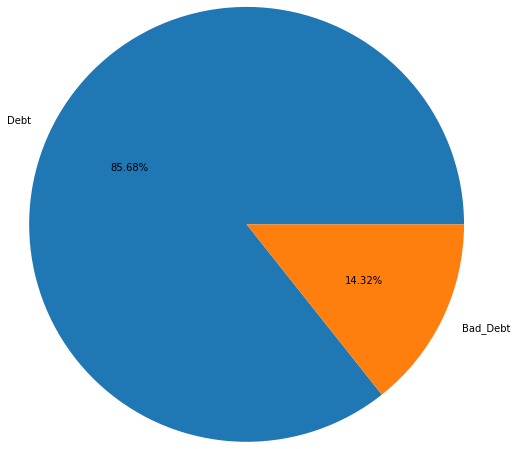

In [37]:
print("Pie chart for overall debt and bad debt : \n")
plt.pie(overall_debt, labels=['Debt', 'Bad_Debt'], autopct='%1.2f%%', radius=2.5)
plt.show()

In [38]:
import seaborn as sns

In [39]:
# Box and Whisker plots
# choosing just 10 unique cities out of total number of cities
cities = combined_df['city'].unique()[0:10]

In [40]:
df = combined_df.loc[combined_df['city'].isin(cities)]

Text(0, 0.5, 'Second Mortgage')

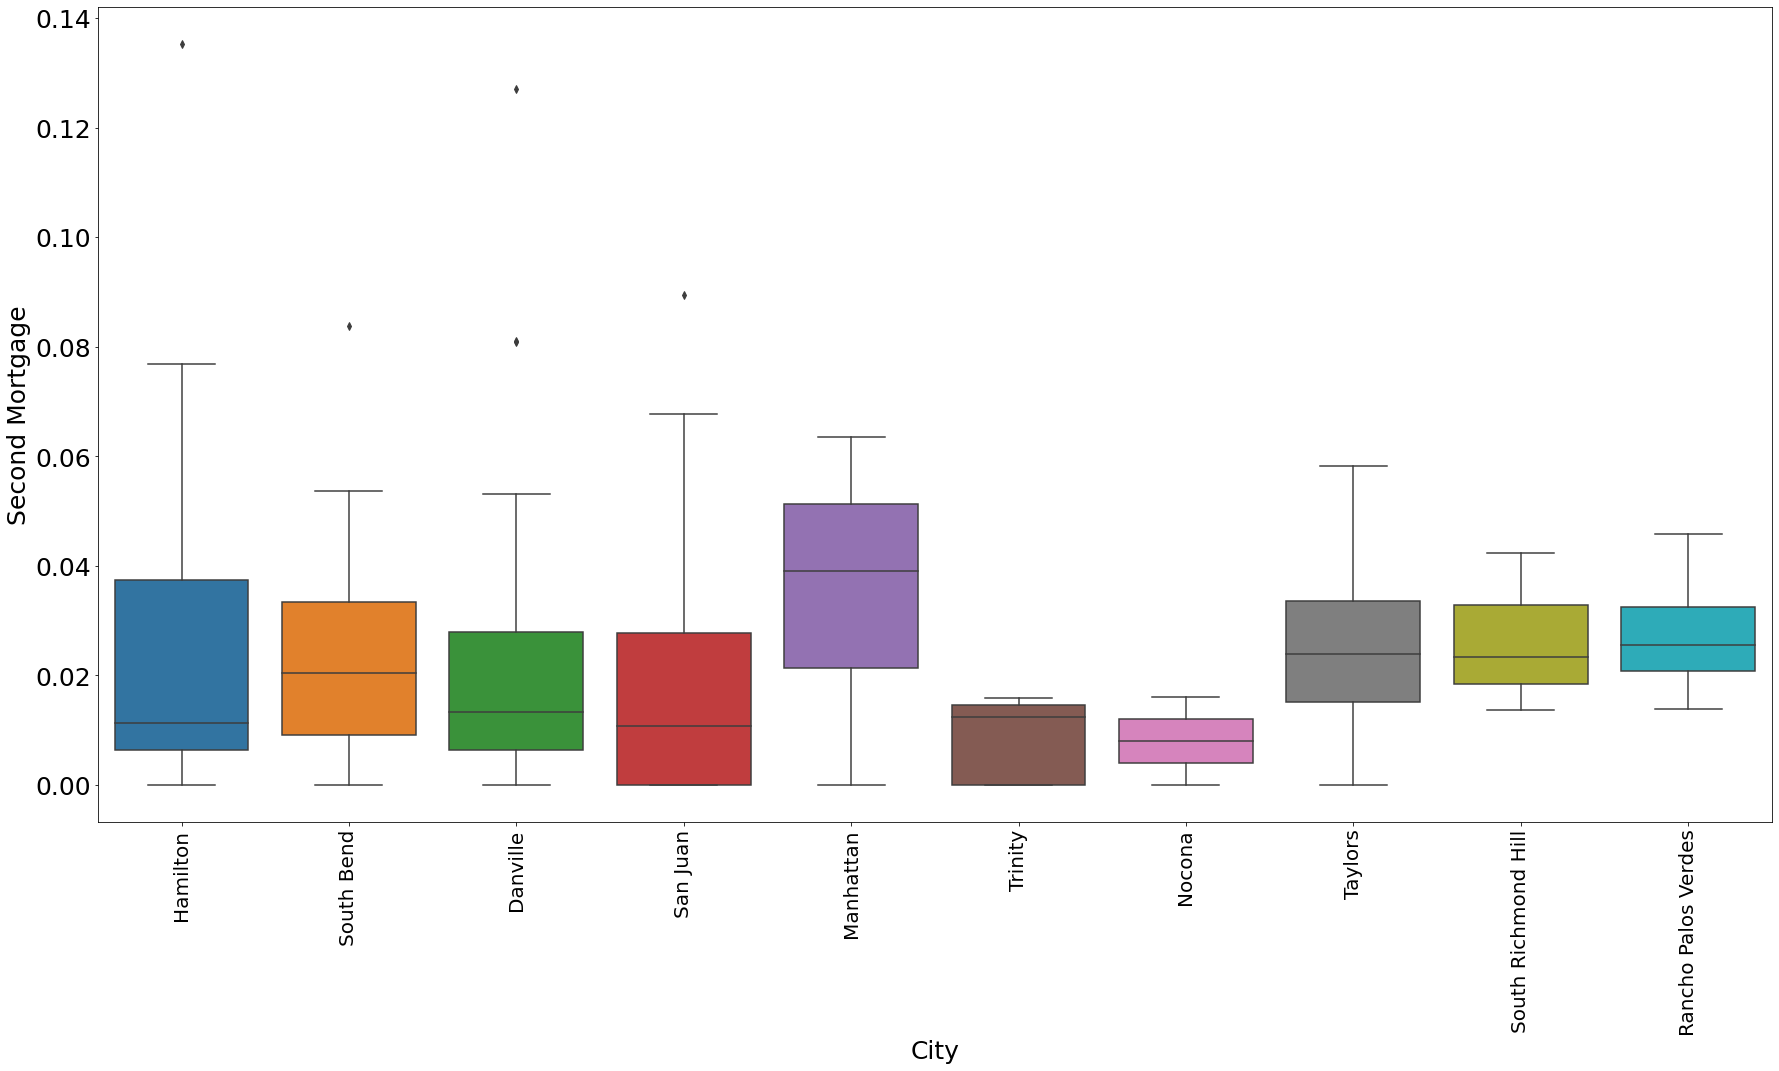

In [41]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['second_mortgage'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Second Mortgage', fontsize = 25)

Text(0, 0.5, 'Home Equity')

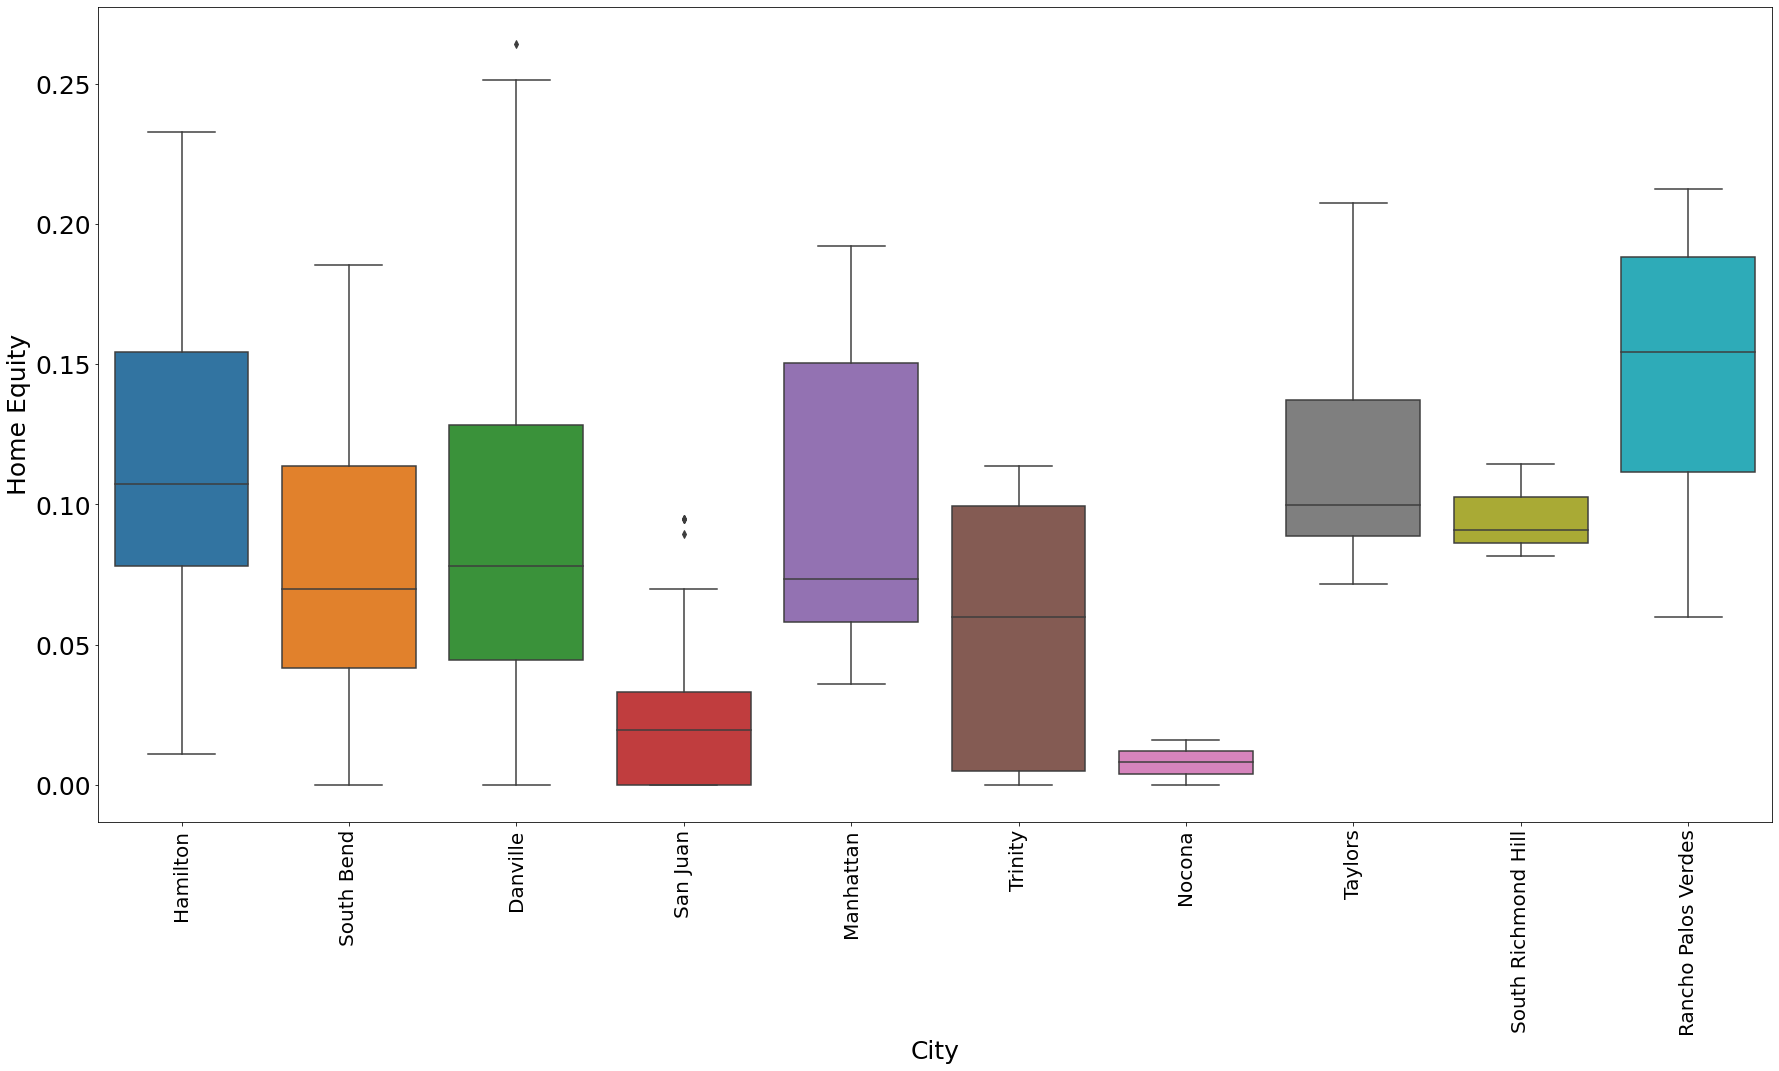

In [42]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['home_equity'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Home Equity', fontsize = 25)

Text(0, 0.5, 'Good Debt')

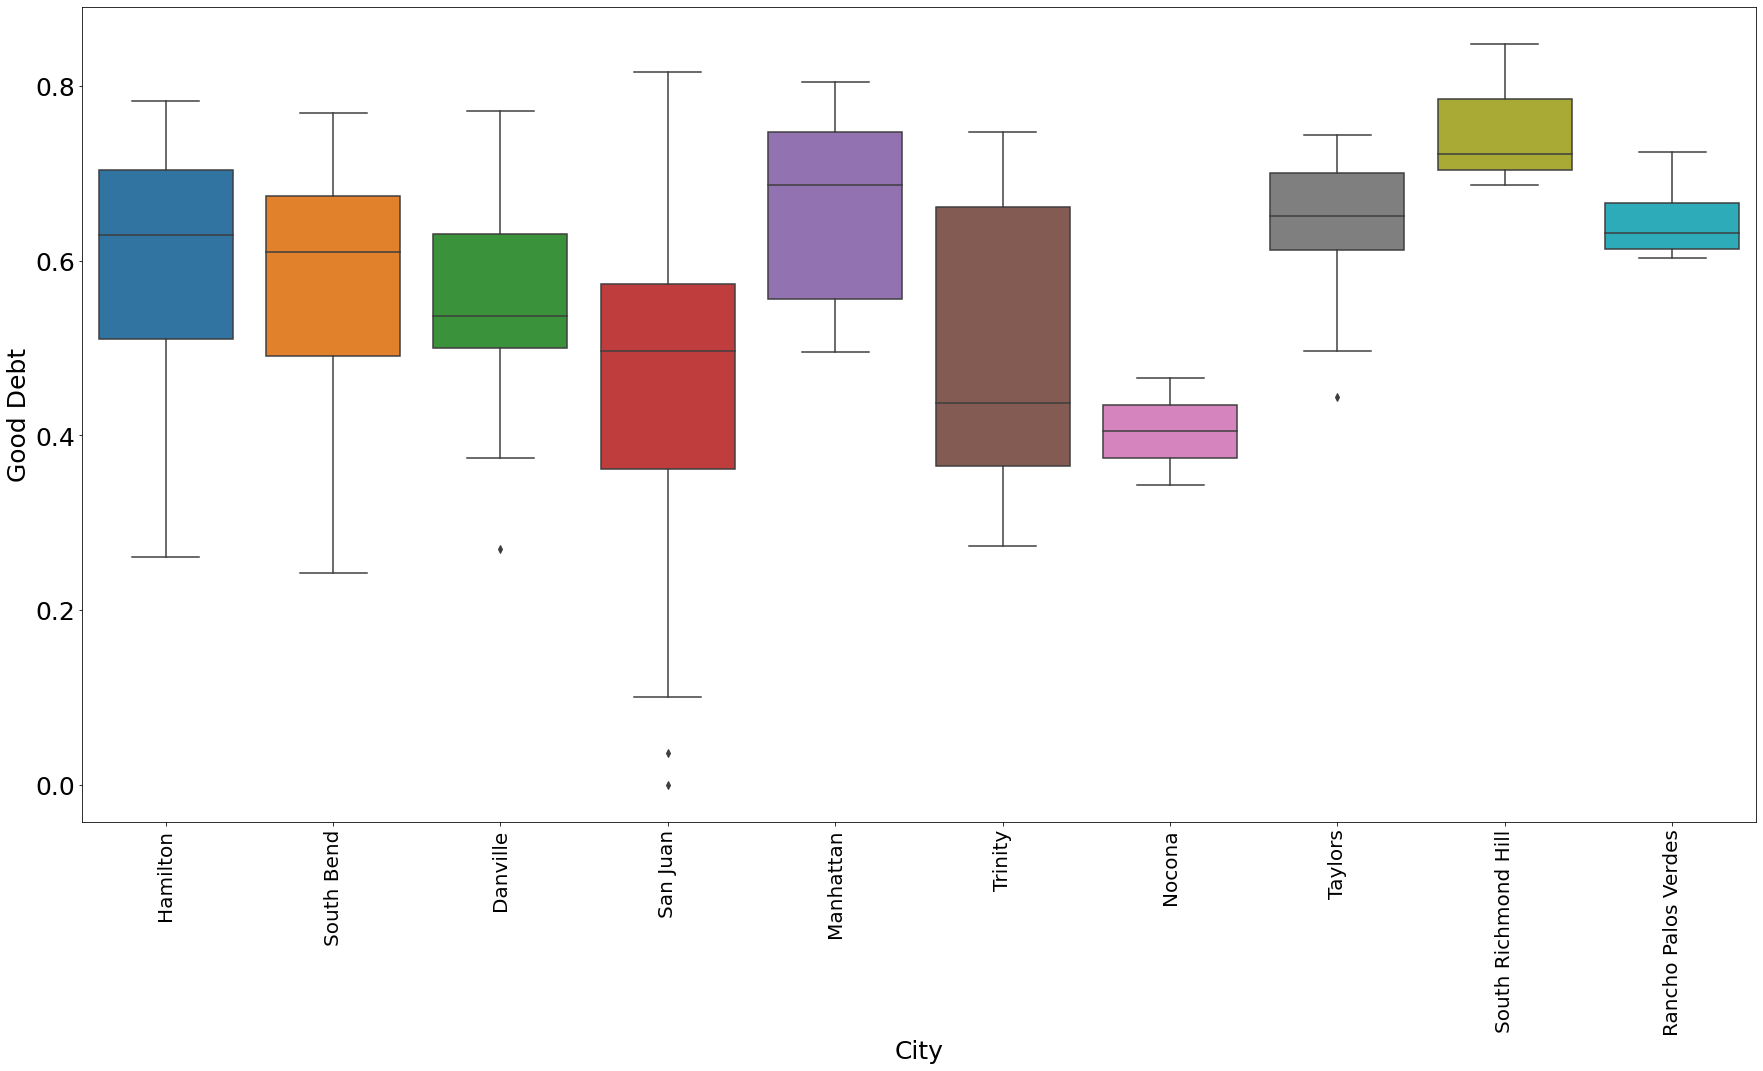

In [43]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['debt'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Good Debt', fontsize = 25)

Text(0, 0.5, 'Bad Debt')

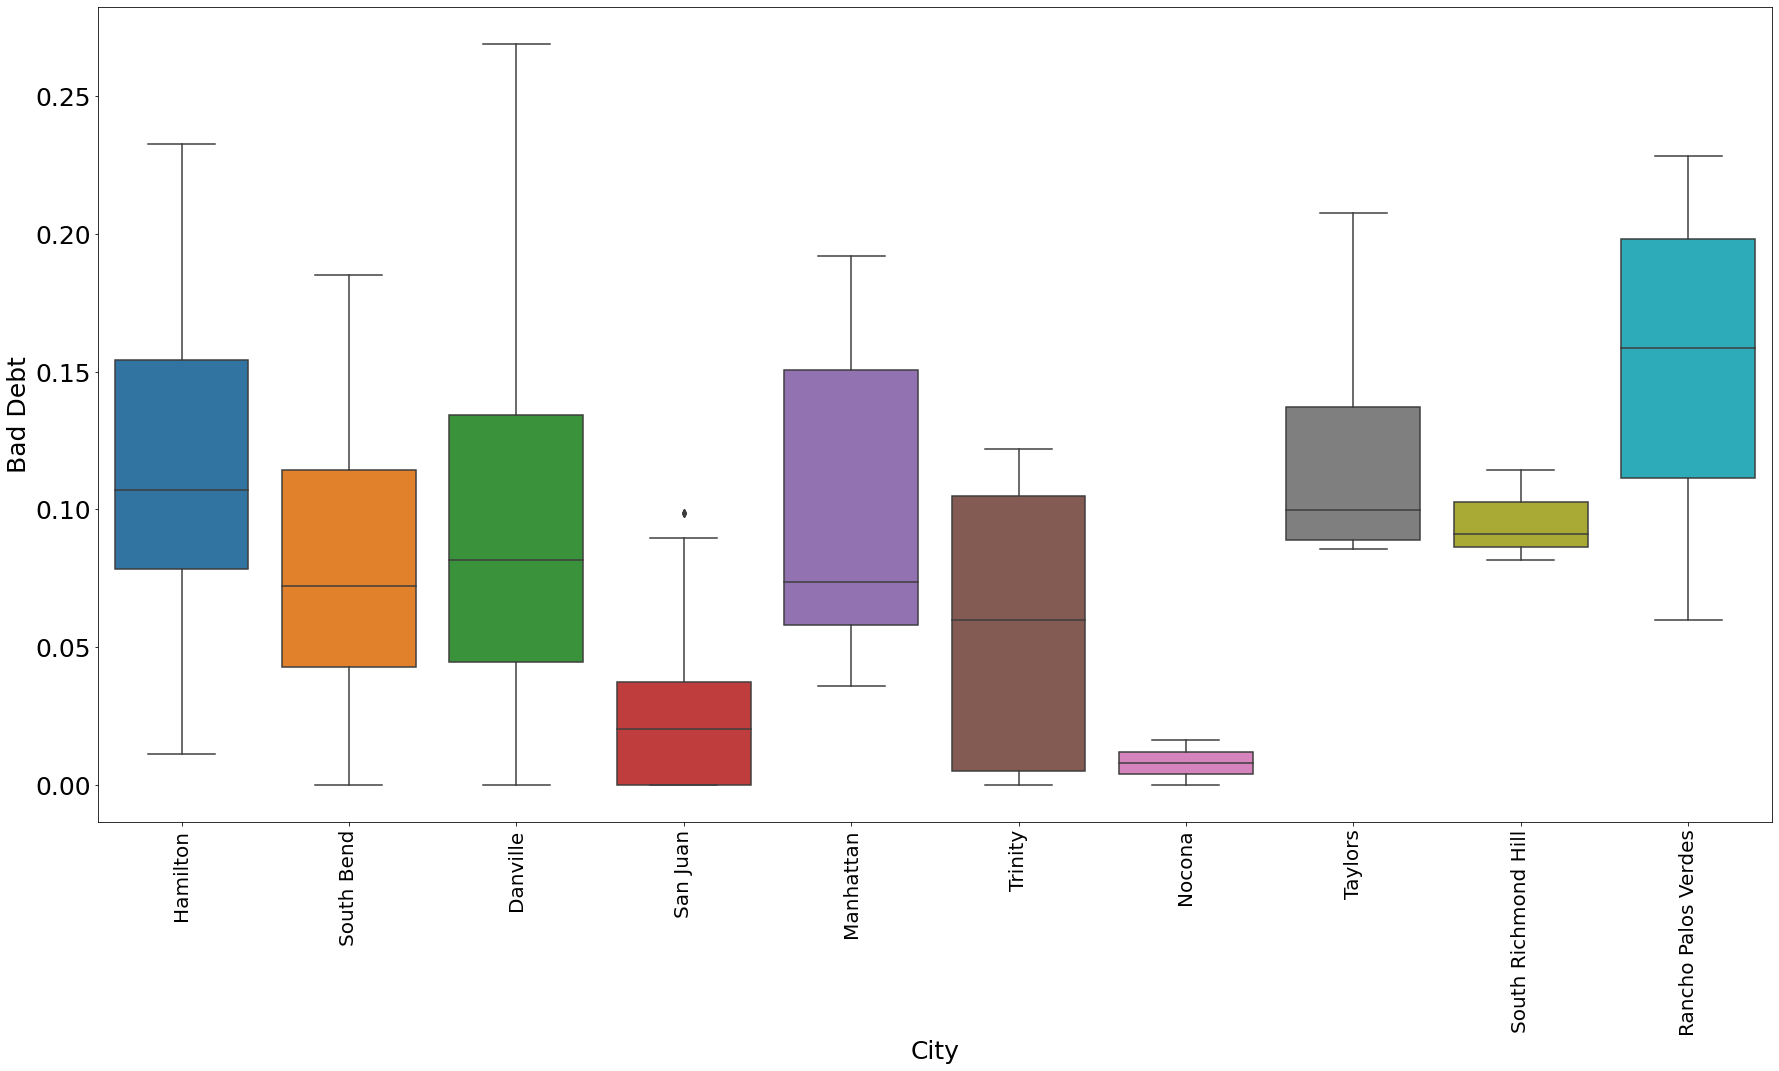

In [44]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['bad_debt'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Bad Debt', fontsize = 25)

<AxesSubplot:xlabel='rent_mean', ylabel='Count'>

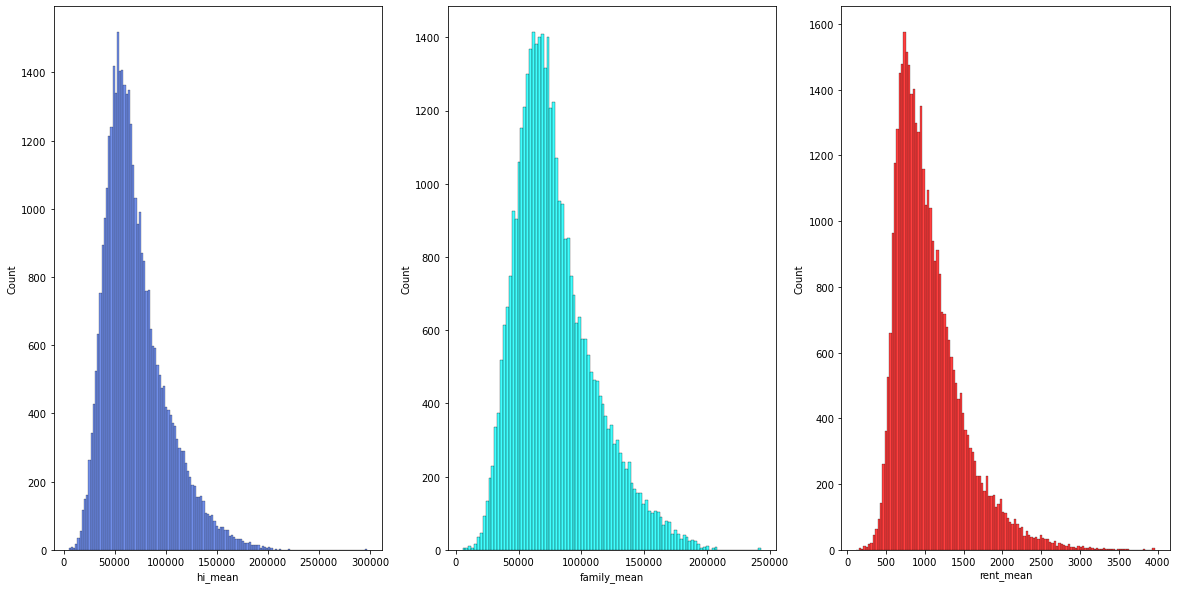

In [45]:
# Collated income distribution chart

f,axs = plt.subplots(1, 3, figsize = (20, 10))
sns.histplot(combined_df['hi_mean'], color='royalblue', ax=axs[0])
sns.histplot(combined_df['family_mean'], color='cyan', ax=axs[1])
sns.histplot(combined_df['rent_mean'], color='red', ax=axs[2])

In [46]:
# Creating new field - population density = pop/Aland
combined_df['pop_density'] = combined_df['pop'] / combined_df['ALand']
combined_df[['pop_density']].head(10)

,pop_density
0,0.000026
1,0.001687
2,0.000099
3,0.002442
4,0.002207
5,0.000070
6,0.000003
7,0.000022
8,0.022401
9,0.001161


In [47]:
# Creating a new field - median age using the below formula
combined_df['median_age'] = (((combined_df['male_age_median']*combined_df['male_pop'])+
                              (combined_df['female_age_median']*combined_df['female_pop']))/
                             (combined_df['male_pop']+combined_df['female_pop']))
combined_df[['median_age']].head(10)

,median_age
0,44.667430
1,34.722748
2,41.774472
3,49.879012
4,21.965629
5,38.758223
6,41.346045
7,51.339949
8,33.975449
9,48.904041


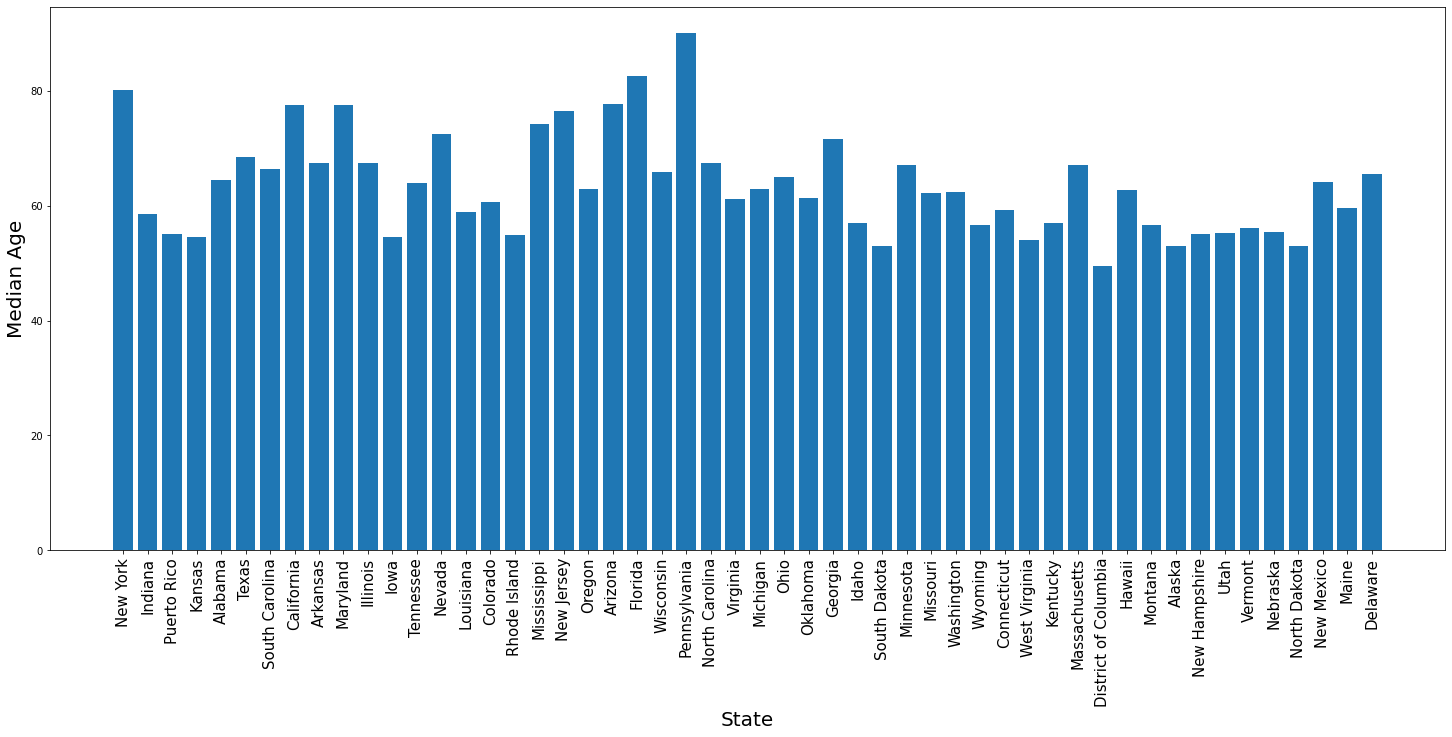

In [48]:
# Visualizing using a bar plot

plt.figure(figsize = (25, 10))
plt.bar('state', 'median_age', data=combined_df)
plt.xlabel('State', fontsize=20)
plt.ylabel('Median Age', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [49]:
# Creating a new field - population class by dividing the population in different intervals
# 0-5000 -->class 1, 5000-10000 --> class 2, 10000-15000 -->class 3, 
# 15000-25000 -->class 4, 25000-55000 -->class 5

combined_df['pop_class'] = pd.cut(x = combined_df['pop'], 
                                  bins = [0,5000,10000,15000,25000,55000], 
                                  labels = ['1', '2', '3','4','5'])

In [50]:
combined_df['pop_class'].value_counts()

1    26173
2    11919
3      439
4       82
5        9
Name: pop_class, dtype: int64

In [51]:
import numpy as np

In [52]:
combined_df['pop_class']= combined_df['pop_class'].astype('int64')

In [53]:
print('The mean value for each population class :')
print("..........................................")
for i in [1,2,3,4,5]:
        for j in ['married','separated','divorced']:
            print('Population Class:',i,'|',
                  'Mean:%.3f'%combined_df[combined_df['pop_class']==i][j].mean(),'|',
                  'Status:',j)

The mean value for each population class :
..........................................
Population Class: 1 | Mean:0.496 | Status: married
Population Class: 1 | Mean:0.020 | Status: separated
Population Class: 1 | Mean:0.104 | Status: divorced
Population Class: 2 | Mean:0.531 | Status: married
Population Class: 2 | Mean:0.017 | Status: separated
Population Class: 2 | Mean:0.092 | Status: divorced
Population Class: 3 | Mean:0.575 | Status: married
Population Class: 3 | Mean:0.016 | Status: separated
Population Class: 3 | Mean:0.081 | Status: divorced
Population Class: 4 | Mean:0.606 | Status: married
Population Class: 4 | Mean:0.011 | Status: separated
Population Class: 4 | Mean:0.064 | Status: divorced
Population Class: 5 | Mean:0.588 | Status: married
Population Class: 5 | Mean:0.013 | Status: separated
Population Class: 5 | Mean:0.060 | Status: divorced


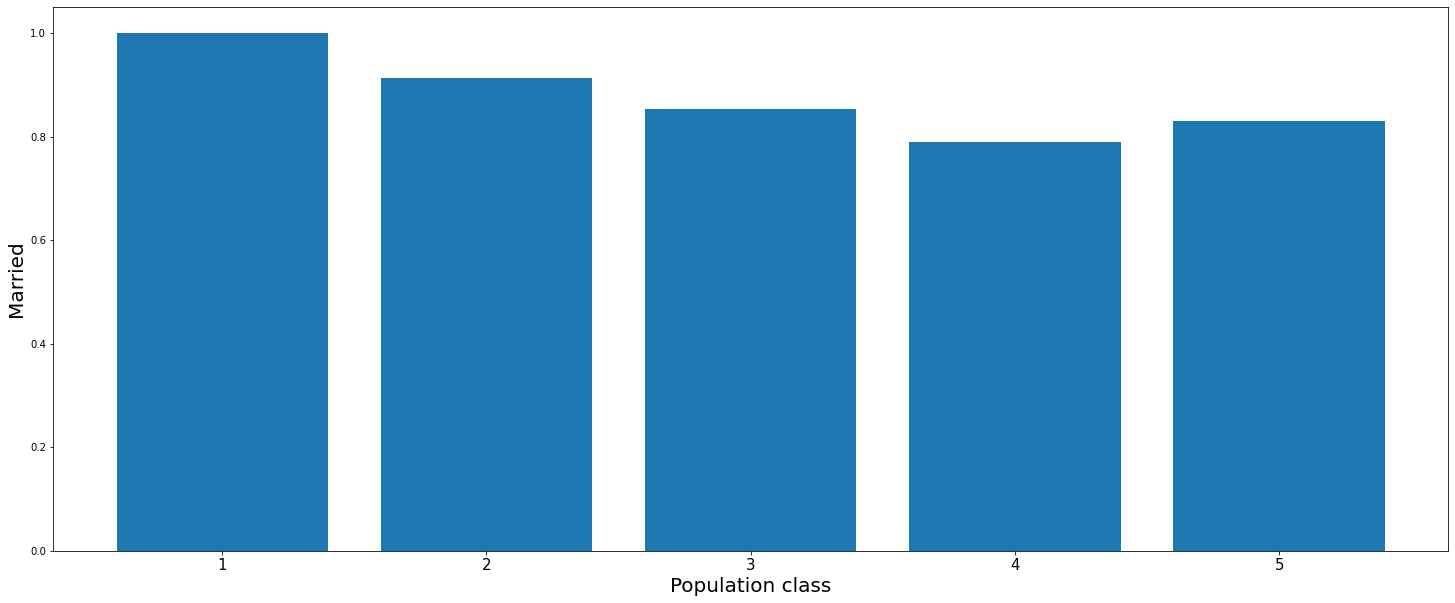

In [54]:
# Visualising using bar chart
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'married', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Married', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

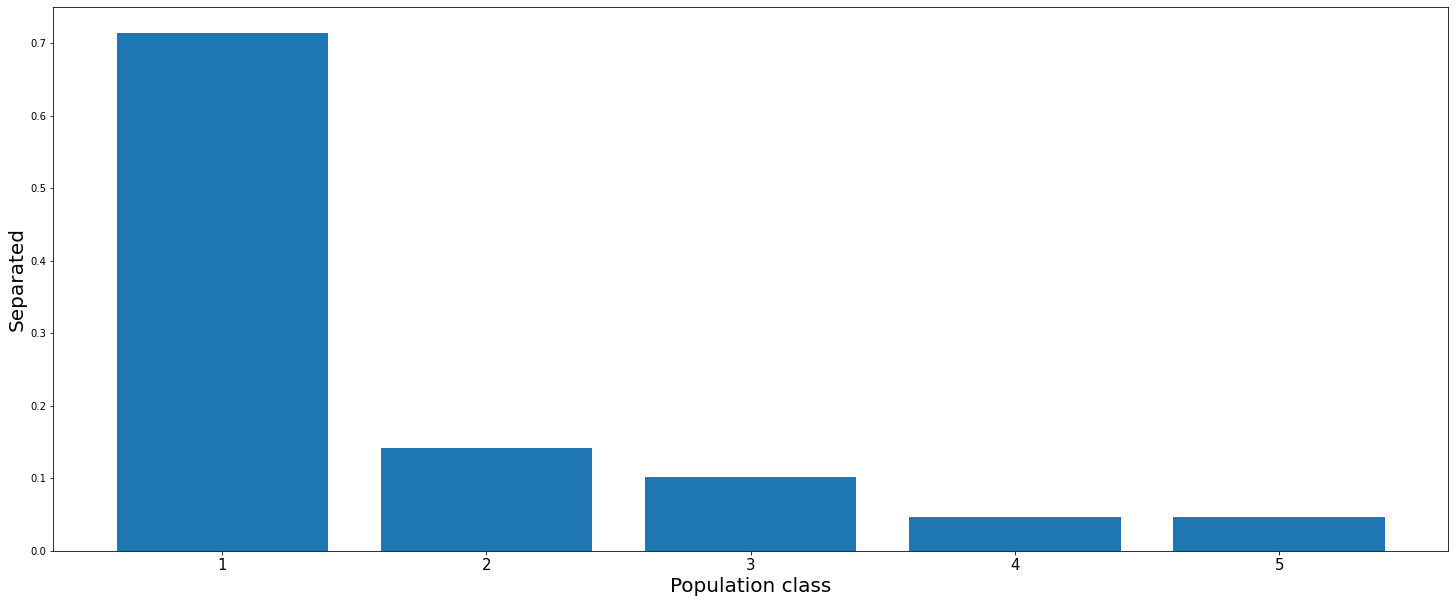

In [55]:
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'separated', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Separated', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

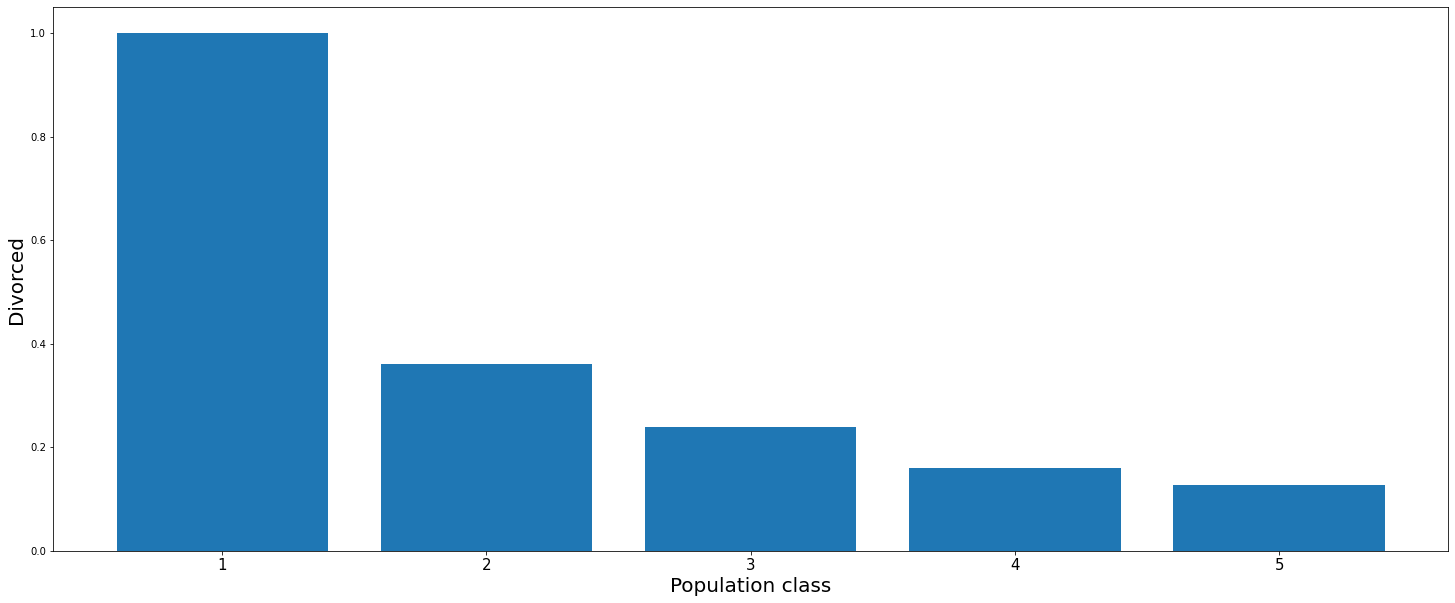

In [56]:
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'divorced', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Divorced', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [57]:
print("Rent as percentage of income :")
combined_df['%_rent'] = (combined_df['rent_mean']/combined_df['hi_mean'])*100
combined_df[['%_rent']].head(10)

Rent as percentage of income :


,%_rent
0,1.218824
1,1.919490
2,0.874441
3,1.648594
4,2.948295
5,1.063222
6,1.143501
7,1.056003
8,2.070796
9,1.766108


In [58]:
print('Total number of states :',combined_df['state'].nunique())

Total number of states : 52


In [59]:
states = combined_df['state'].unique().tolist()
states

['New York',
 'Indiana',
 'Puerto Rico',
 'Kansas',
 'Alabama',
 'Texas',
 'South Carolina',
 'California',
 'Arkansas',
 'Maryland',
 'Illinois',
 'Iowa',
 'Tennessee',
 'Nevada',
 'Louisiana',
 'Colorado',
 'Rhode Island',
 'Mississippi',
 'New Jersey',
 'Oregon',
 'Arizona',
 'Florida',
 'Wisconsin',
 'Pennsylvania',
 'North Carolina',
 'Virginia',
 'Michigan',
 'Ohio',
 'Oklahoma',
 'Georgia',
 'Idaho',
 'South Dakota',
 'Minnesota',
 'Missouri',
 'Washington',
 'Wyoming',
 'Connecticut',
 'West Virginia',
 'Kentucky',
 'Massachusetts',
 'District of Columbia',
 'Hawaii',
 'Montana',
 'Alaska',
 'New Hampshire',
 'Utah',
 'Vermont',
 'Nebraska',
 'North Dakota',
 'New Mexico',
 'Maine',
 'Delaware']

In [60]:
print("'Mean rent as percentage of income per state:\n")
print("States",'\t\t % Rent\n')
for i in states:
            print(i,'=','%.3f'%combined_df[combined_df['state']==i]['%_rent'].mean(),'%')
            print("------------------------")

'Mean rent as percentage of income per state:

States 		 % Rent

New York = 1.705 %
------------------------
Indiana = 1.469 %
------------------------
Puerto Rico = 1.958 %
------------------------
Kansas = 1.368 %
------------------------
Alabama = 1.468 %
------------------------
Texas = 1.526 %
------------------------
South Carolina = 1.532 %
------------------------
California = 1.897 %
------------------------
Arkansas = 1.384 %
------------------------
Maryland = 1.599 %
------------------------
Illinois = 1.542 %
------------------------
Iowa = 1.209 %
------------------------
Tennessee = 1.489 %
------------------------
Nevada = 1.764 %
------------------------
Louisiana = 1.555 %
------------------------
Colorado = 1.591 %
------------------------
Rhode Island = 1.474 %
------------------------
Mississippi = 1.527 %
------------------------
New Jersey = 1.644 %
------------------------
Oregon = 1.594 %
------------------------
Arizona = 1.725 %
------------------------
Flori

In [61]:
# to find correlation and plot heatmap, I will take out features that are categorical

subset1 = combined_df.iloc[:,12:77]
subset1.head()

,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [62]:
subset1.corr()

,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
ALand,1.000000,0.455449,-0.032923,-0.021729,-0.042678,-0.071482,-0.069624,-0.035939,-0.047300,-0.070233,-0.105325,-0.102961,-0.090673,-0.079983,-0.066092,-0.059511,-0.054332,-0.053439,-0.061230,-0.069523,-0.030496,-0.031699,-0.019857,-0.025387,-0.040225,-0.029892,-0.031382,-0.018981,-0.008772,-0.025676,-0.059813,-0.061682,-0.016672,-0.007320,-0.037560,-0.059381,-0.060837,-0.007894,0.061176,0.077908,-0.042557,-0.044954,-0.082397,-0.122598,0.047610,0.090762,0.111788,-0.002124,-0.005929,0.003403,0.048219,0.055898,0.036354,-0.020998,-0.021783,0.020844,0.034160,0.027613,-0.041931,-0.042914,0.054511,0.032989,0.009389,-0.006100,0.024592
AWater,0.455449,1.000000,-0.013074,-0.009509,-0.016076,-0.011709,-0.011278,0.001320,-0.017178,-0.020876,-0.038784,-0.033251,-0.033509,-0.028447,-0.023622,-0.021830,-0.019826,-0.018591,-0.018628,-0.020785,-0.003637,-0.004075,0.000071,-0.016237,-0.018336,-0.003754,-0.004514,0.001099,-0.011093,-0.014025,-0.011970,-0.012337,0.001784,-0.014079,-0.017565,-0.011071,-0.011591,0.004473,0.012466,0.014574,-0.015179,-0.015234,-0.025543,-0.043756,0.018172,0.028378,0.035828,0.005548,0.005388,0.005127,0.008703,0.011511,-0.002973,-0.008562,-0.009513,-0.005615,-0.002002,-0.007199,-0.015911,-0.016145,0.010880,0.000963,0.024880,0.005697,0.005445
pop,-0.032923,-0.013074,1.000000,0.979398,0.979774,0.163460,0.157320,0.120056,0.249878,0.407624,0.060926,0.056329,0.019491,-0.003644,-0.012509,-0.021182,-0.029568,-0.042683,0.424913,0.414505,0.173600,0.178447,0.133947,0.710603,0.895580,0.135570,0.130349,0.115412,0.784802,0.929001,0.113466,0.108300,0.086695,0.640990,0.767669,0.058901,0.056803,0.059366,0.460343,0.389211,0.083641,0.082808,0.104680,0.241463,-0.149918,-0.130420,-0.249127,0.051071,0.058435,0.041138,-0.186133,-0.151094,-0.022849,0.908863,0.978958,-0.187897,-0.156152,-0.025017,0.921085,0.979159,0.096191,0.174286,-0.037980,-0.083472,-0.162148
male_pop,-0.021729,-0.009509,0.979398,1.000000,0.919180,0.159282,0.153800,0.110374,0.224996,0.382443,0.047927,0.041275,0.005043,-0.016821,-0.025674,-0.033066,-0.041423,-0.054420,0.397651,0.387242,0.174284,0.179963,0.130090,0.670600,0.852274,0.133712,0.128374,0.111467,0.754304,0.893347,0.108431,0.103272,0.084069,0.614168,0.737093,0.048311,0.046040,0.053724,0.440403,0.375083,0.077888,0.076862,0.098030,0.228931,-0.142718,-0.120845,-0.237425,0.032673,0.038792,0.032990,-0.198907,-0.161479,-0.072399,0.941065,0.999596,-0.191231,-0.154260,-0.061878,0.864340,0.919515,0.095353,0.141549,-0.001637,-0.075661,-0.147472
female_pop,-0.042678,-0.016076,0.979774,0.919180,1.000000,0.160958,0.154415,0.124771,0.264380,0.416011,0.071331,0.068957,0.033016,0.009562,0.001045,-0.008545,-0.016619,-0.029318,0.434659,0.424675,0.165867,0.169692,0.132326,0.721364,0.902096,0.131901,0.127008,0.114631,0.783128,0.926577,0.113844,0.108881,0.085773,0.641518,0.766769,0.067000,0.065160,0.062545,0.461394,0.387394,0.085942,0.085334,0.107014,0.244069,-0.150961,-0.134606,-0.250599,0.067228,0.075526,0.047540,-0.165909,-0.134662,0.027180,0.840016,0.918722,-0.176957,-0.151680,0.012525,0.939882,0.998469,0.093112,0.199644,-0.072450,-0.087820,-0.170101
rent_mean,-0.0

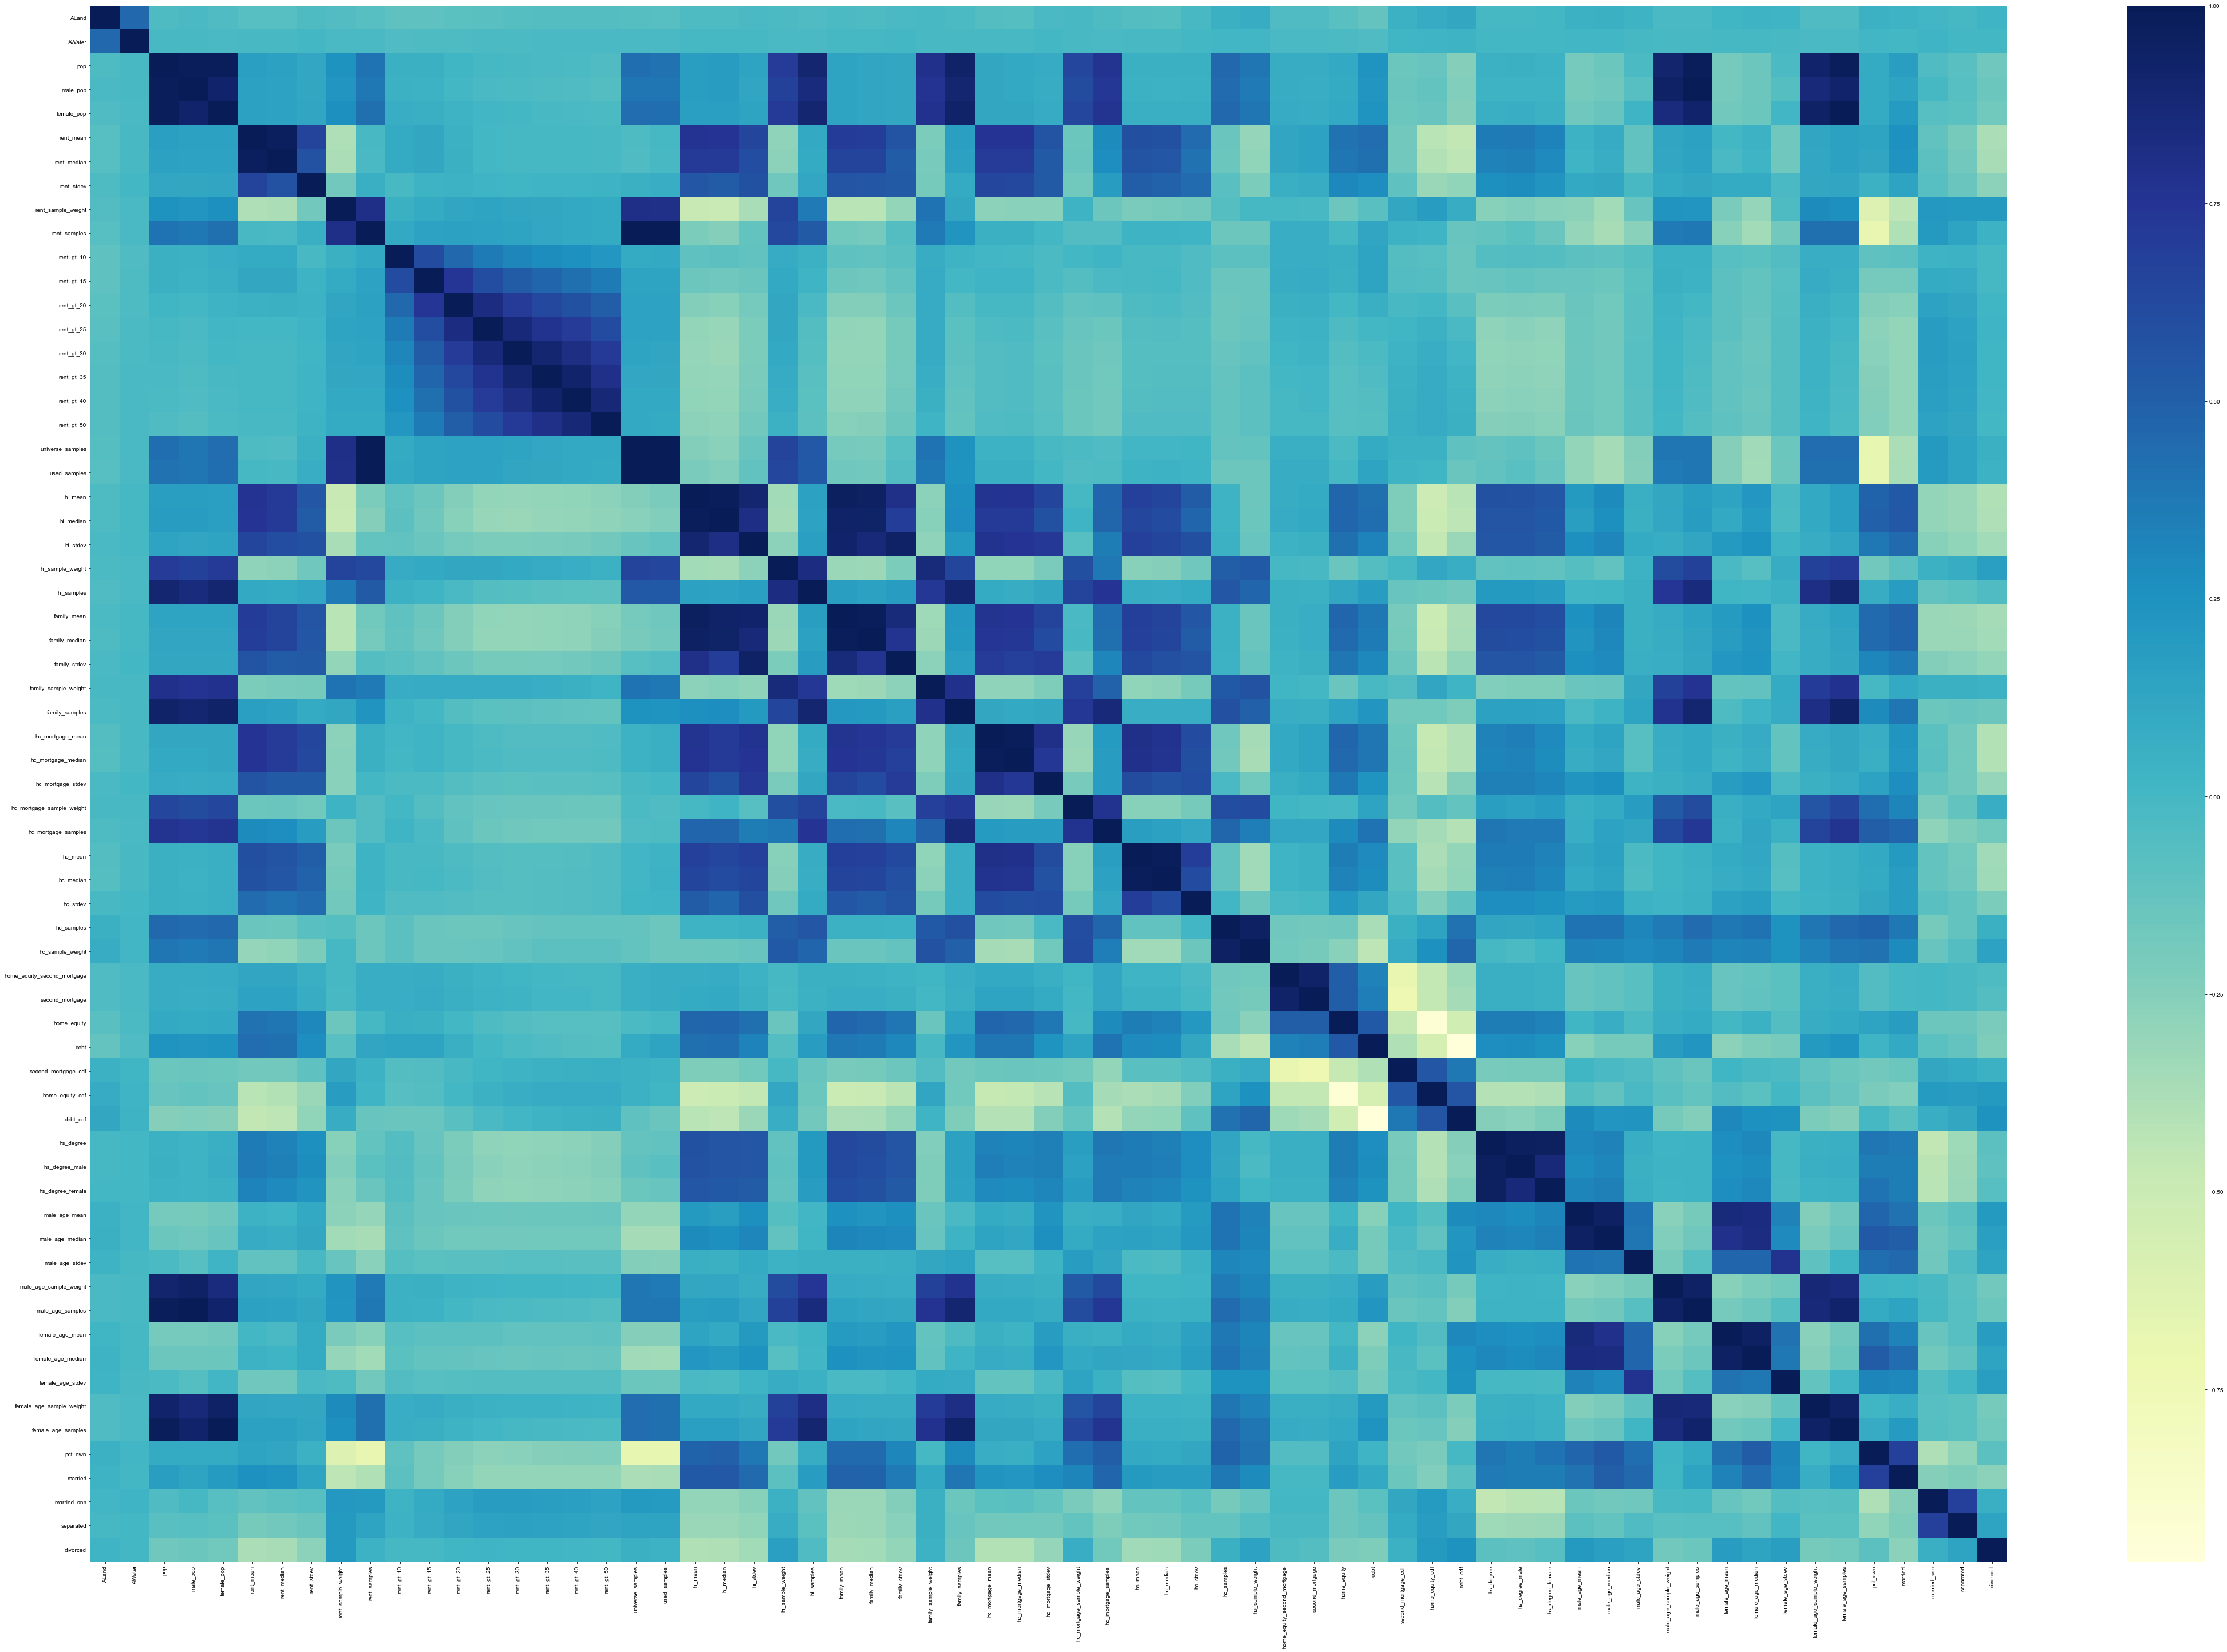

In [63]:
plt.figure(figsize = (75,50))
sns.heatmap(data=subset1.corr(), cmap="YlGnBu")
sns.set(font_scale=4)

### Data Pre-processing

In [64]:
subset1.head()

,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [65]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [66]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [67]:
fa = FactorAnalyzer()
fa.fit(subset1, 10)

FactorAnalyzer(rotation_kwargs={})

fa = FactorAnalyzer()
fa.fit(subset1, 10)

In [68]:
ev, v = fa.get_eigenvalues()

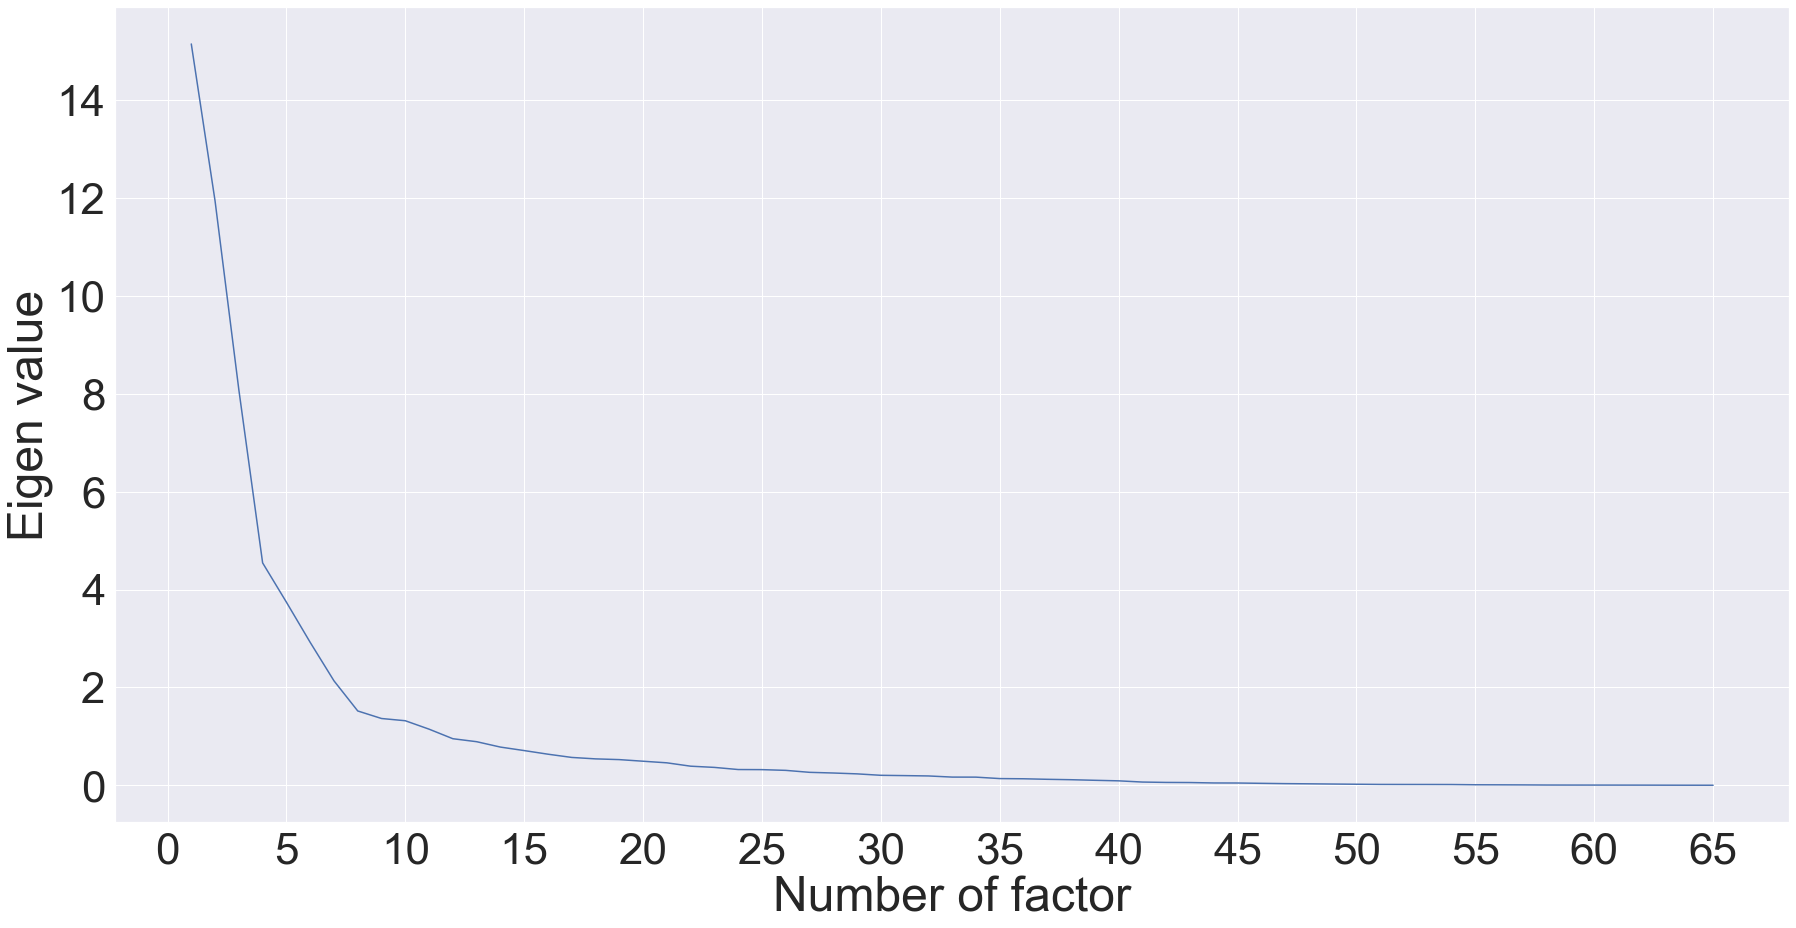

In [69]:
plt.figure(figsize = (30,15))
plt.plot(range(1, subset1.shape[1]+1), ev)
plt.xticks(np.arange(0, 70, step=5))
plt.xlabel('Number of factor')
plt.ylabel('Eigen value')
plt.show()

In [70]:
# There is an elbow bend at 7/8, will use 8 as n

In [71]:
n = 8
fa = FactorAnalyzer(n)
fa.fit(subset1, 10)
loads = fa.loadings_

print(loads)

[[-3.33373008e-03 -1.49337269e-02 -4.35546157e-02 -4.18560802e-02
  -1.53763205e-02  4.75300916e-03  1.36201411e-02 -1.82857122e-01]
 [-1.89265842e-03  1.66228280e-02 -8.85199905e-03 -1.25827565e-02
  -3.42481116e-02  9.46074021e-03  1.96987427e-02 -1.16703956e-01]
 [ 9.88776288e-01  1.27974727e-01 -1.26830789e-03  1.03770951e-01
  -9.48633652e-02 -8.98557437e-02  6.54512034e-03  1.49651785e-02]
 [ 9.62452955e-01  1.31358319e-01 -1.51799157e-02  7.86534701e-02
  -1.30059160e-01 -1.03929599e-01  9.93021620e-03 -1.63611997e-02]
 [ 9.66058429e-01  1.16802093e-01  1.27411077e-02  1.26718876e-01
  -5.43058812e-02 -6.75111482e-02  3.02359196e-03  4.71512327e-02]
 [ 6.50140680e-02  7.79322837e-01  1.08530611e-01 -1.09592895e-01
  -7.62487391e-02 -2.95044433e-02 -3.20944985e-02  1.48493384e-01]
 [ 6.59051227e-02  7.32441879e-01  9.77722103e-02 -1.25280543e-01
  -8.77109145e-02 -4.54522495e-02 -3.17312774e-02  1.53613123e-01]
 [ 3.25993624e-02  7.23847932e-01  1.07796566e-01  8.00402643e-02
   

In [72]:
df1 = pd.DataFrame(loads)
df1.set_index(subset1.columns, drop=True, inplace=True)
for i in range(n):
    s = 'Factor ' + str(i+1)
    df1.rename(columns = {i : s}, inplace=True)
    
df1

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
ALand,-0.003334,-0.014934,-0.043555,-0.041856,-0.015376,0.004753,0.013620,-0.182857
AWater,-0.001893,0.016623,-0.008852,-0.012583,-0.034248,0.009461,0.019699,-0.116704
pop,0.988776,0.127975,-0.001268,0.103771,-0.094863,-0.089856,0.006545,0.014965
male_pop,0.962453,0.131358,-0.015180,0.078653,-0.130059,-0.103930,0.009930,-0.016361
female_pop,0.966058,0.116802,0.012741,0.126719,-0.054306,-0.067511,0.003024,0.047151
rent_mean,0.065014,0.779323,0.108531,-0.109593,-0.076249,-0.029504,-0.032094,0.148493
rent_median,0.065905,0.732442,0.097772,-0.125281,-0.087711,-0.045452,-0.031731,0.153613
rent_stdev,0.032599,0.723848,0.107797,0.080040,0.063017,-0.034189,-0.004297,0.009527
rent_sample_weight,0.169974,-0.215519,-0.096961,0.832090,0.002258,0.043254,-0.001613,0.048832
rent_samples,0.246404,0.138458,-0.082039,0.991947,-0.055472,0.055921,-0.006797,0.098805


In [73]:
# Creating a dataframe of latent variables
latent_variables = combined_df[['pct_own','median_age','second_mortgage','bad_debt','hs_degree']]
latent_variables.head()

,pct_own,median_age,second_mortgage,bad_debt,hs_degree
0,0.79046,44.667430,0.02077,0.09408,0.89288
1,0.52483,34.722748,0.02222,0.04274,0.90487
2,0.85331,41.774472,0.00000,0.09512,0.94288
3,0.65037,49.879012,0.01086,0.01086,0.91500
4,0.13046,21.965629,0.05426,0.05426,1.00000


In [74]:
latent_variables.corr()

,pct_own,median_age,second_mortgage,bad_debt,hs_degree
pct_own,1.000000,0.548747,-0.050761,0.133315,0.394067
median_age,0.548747,1.000000,-0.116364,0.056075,0.334217
second_mortgage,-0.050761,-0.116364,1.000000,0.559154,0.063609
bad_debt,0.133315,0.056075,0.559154,1.000000,0.350089
hs_degree,0.394067,0.334217,0.063609,0.350089,1.000000


## Data Modeling

In [75]:
combined_df.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type,bad_debt,pop_density,median_age,pop_class,%_rent
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.000026,44.667430,2,1.218824
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.001687,34.722748,1,1.919490
2,245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.000099,41.774472,2,0.874441
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.002442,49.879012,1,1.648594
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395

In [76]:
model1 = combined_df.drop(columns=['UID','COUNTYID','STATEID','state_ab','zip_code','area_code','lat','lng','type'])

In [77]:
# We have 3 features that are categorical, will convert them into integer using label encoder

from sklearn.preprocessing import LabelEncoder

In [78]:
le5 = LabelEncoder()
model1['state']=le5.fit_transform(model1['state'])

In [79]:
le6 = LabelEncoder()
model1['city']=le6.fit_transform(model1['city'])

In [80]:
le7 = LabelEncoder()
model1['place']=le7.fit_transform(model1['place'])

In [81]:
le8 = LabelEncoder()
model1['data_type']=le8.fit_transform(model1['data_type'])

In [82]:
model1.head()

,state,city,place,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,data_type,bad_debt,pop_density,median_age,pop_class,%_rent
0,32,2952,4320,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,1,0.09408,0.000026,44.667430,2,1.218824
1,14,6797,9071,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,1,0.04274,0.001687,34.722748,1,1.919490
2,14,1708,2470,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,1,0.09512,0.000099,41.774472,2,0.874441
3,39,6402,4251,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,1,0.01086,0.002442,49.879012,1,1.648594
4,16,4255,6274,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.00000,26.07533,22.41667,11.84399,1296.89877,2586.0,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,1,0.05426,0.002207,21.965629,2,2.948295


In [83]:
model1_train = model1[model1['data_type']==1]
model1_test = model1[model1['data_type']==0]

In [84]:
model1_x_train = model1_train.drop(columns=['hc_mortgage_mean']).values
model1_x_train

array([[3.20000000e+01, 2.95200000e+03, 4.32000000e+03, ...,
        4.46674298e+01, 2.00000000e+00, 1.21882442e+00],
       [1.40000000e+01, 6.79700000e+03, 9.07100000e+03, ...,
        3.47227481e+01, 1.00000000e+00, 1.91949027e+00],
       [1.40000000e+01, 1.70800000e+03, 2.47000000e+03, ...,
        4.17744723e+01, 2.00000000e+00, 8.74441002e-01],
       ...,
       [5.00000000e+00, 7.74200000e+03, 9.17800000e+03, ...,
        4.40893115e+01, 1.00000000e+00, 1.06319740e+00],
       [4.40000000e+01, 1.42500000e+03, 2.08800000e+03, ...,
        4.50292805e+01, 3.00000000e+00, 1.19174324e+00],
       [2.80000000e+01, 3.87500000e+03, 8.00500000e+03, ...,
        3.11323118e+01, 1.00000000e+00, 1.83906163e+00]])

In [85]:
model1_x_test = model1_test.drop(columns=['hc_mortgage_mean']).values
model1_x_test

array([[2.20000000e+01, 1.81600000e+03, 2.52000000e+03, ...,
        3.11890533e+01, 1.00000000e+00, 1.75578752e+00],
       [1.90000000e+01, 2.69000000e+02, 3.91000000e+02, ...,
        4.63829910e+01, 1.00000000e+00, 1.15114733e+00],
       [3.80000000e+01, 5.67800000e+03, 6.72600000e+03, ...,
        4.31474198e+01, 1.00000000e+00, 1.39485508e+00],
       ...,
       [2.10000000e+01, 3.89700000e+03, 6.64000000e+03, ...,
        3.93236302e+01, 2.00000000e+00, 1.19454582e+00],
       [1.50000000e+01, 1.05000000e+03, 1.57000000e+03, ...,
        4.45285973e+01, 2.00000000e+00, 1.20415796e+00],
       [4.40000000e+01, 2.77000000e+02, 1.03090000e+04, ...,
        3.52071711e+01, 1.00000000e+00, 1.63791229e+00]])

In [86]:
model1_x_train.shape, model1_x_test.shape

((27019, 73), (11603, 73))

In [87]:
model1_y_train = model1_train['hc_mortgage_mean'].values
model1_y_train

array([1414.80295,  864.4139 , 1506.06758, ..., 1671.07908, 3074.83088,
       1455.4234 ])

In [88]:
model1_y_test = model1_test['hc_mortgage_mean'].values
model1_y_test

array([1139.24548, 1533.25988, 1254.54462, ..., 1791.63902, 1182.30365,
       1364.17379])

### Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Creating the first model with all the features

In [90]:
model1_lr = LinearRegression()

In [91]:
model1_lr.fit(model1_x_train,model1_y_train)

LinearRegression()

In [92]:
model1_y_pred = model1_lr.predict(model1_x_test)

In [93]:
print("R² for model 1 = ",r2_score(model1_y_test, model1_y_pred))

R² for model 1 =  0.9874477647136035


### **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model. Hence, will reduce the number of features

In [94]:
import math

In [95]:
RMSE =  math.sqrt(mean_squared_error(model1_y_test, model1_y_pred))
print('Root mean square error for model 1 = ', RMSE)

Root mean square error for model 1 =  70.59062563576497


<AxesSubplot:ylabel='Count'>

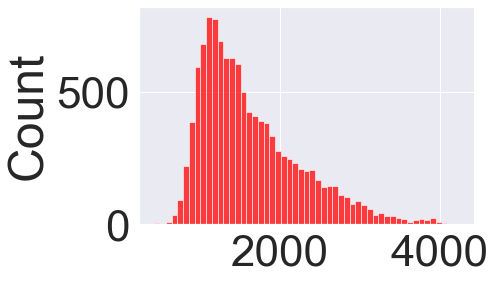

In [96]:
sns.histplot(model1_y_pred, color="red",)

In [97]:
combined_df.corr()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,pop_density,median_age,pop_class,%_rent
UID,1.000000,0.262508,0.977250,-0.224913,0.020760,0.177594,0.289902,-0.015847,-0.028310,-0.023254,-0.025186,-0.020394,-0.182954,-0.177781,-0.139909,0.056419,-0.042027,-0.056144,-0.095065,-0.107359,-0.108824,-0.107664,-0.101086,-0.095200,-0.081071,-0.035628,-0.041552,-0.048430,-0.039842,-0.067373,0.025172,0.010258,-0.035291,-0.028249,-0.060317,0.011504,0.007922,-0.138388,-0.135819,-0.140834,0.053182,-0.001505,0.024349,0.031208,-0.030381,0.100627,0.088294,-0.089673,-0.102232,-0.124191,-0.133495,0.102974,0.131816,0.138747,0.044964,0.037504,0.050180,-0.028699,-0.020280,0.041901,-0.024528,-0.025064,-0.024132,-0.015784,0.049164,-0.019600,-0.020603,0.071212,0.041156,-0.038161,0.017284,0.011448,-0.129954,-0.014908,-0.018141,-0.016743,-0.144161
COUNTYID,0.262508,1.000000,0.224545,0.034504,0.064198,-0.150504,0.071227,0.011864,0.012463,0.001943,0.002400,0.001410,-0.093448,-0.091172,-0.088909,0.042261,-0.007713,-0.015026,-0.025837,-0.024709,-0.023527,-0.019961,-0.019380,-0.018956,-0.020398,-0.005420,-0.008723,-0.070438,-0.068327,-0.071032,0.029234,-0.001399,-0.068403,-0.066202,-0.059877,0.034575,0.002186,-0.134937,-0.132791,-0.120457,0.039741,-0.018133,-0.084835,-0.084611,-0.051458,0.037616,0.051098,-0.031955,-0.041034,-0.123552,-0.082296,0.056715,0.141712,0.079686,-0.055238,-0.053560,-0.052769,-0.062597,-0.063527,-0.008951,0.004503,0.002275,-0.054960,-0.053797,-0.001783,0.004495,0.001221,-0.001569,-0.016390,0.036329,0.063948,0.048694,-0.125309,-0.080217,-0.060917,0.003548,-0.015744
STATEID,0.977250,0.224545,1.000000,-0.263080,0.041162,0.106460,0.320501,-0.015467,-0.026276,-0.030100,-0.033083,-0.025920,-0.209580,-0.203462,-0.155954,0.055743,-0.051379,-0.052066,-0.088451,-0.098775,-0.099006,-0.096306,-0.090360,-0.084203,-0.068902,-0.039253,-0.052078,-0.079049,-0.068810,-0.097341,0.033889,0.002675,-0.066367,-0.056456,-0.091512,0.024759,0.001709,-0.158548,-0.155084,-0.157084,0.051915,-0.016580,-0.010354,-0.001858,-0.055988,0.112699,0.110983,-0.100991,-0.113755,-0.144348,-0.161129,0.120948,0.158124,0.159765,0.017385,0.009270,0.024837,-0.024168,-0.019082,0.048581,-0.030935,-0.032978,-0.015487,-0.009273,0.053242,-0.024286,-0.026035,0.069107,0.025293,-0.032665,0.028862,0.017456,-0.150047,-0.011986,-0.014016,-0.022874,-0.129989
zip_code,-0.224913,0.034504,-0.263080,1.000000,-0.006866,-0.064274,-0.927673,0.072676,0.031016,0.075278,0.093413,0.054250,0.075362,0.068115,0.035634,0.028192,0.065302,-0.000352,0.004445,-0.005908,-0.014081,-0.013923,-0.017813,-0.025526,-0.037271,0.060211,0.068524,0.006361,0.005796,-0.002076,0.012035,0.017467,-0.018499,-0.022723,-0.005338,0.049492,0.037730,-0.017703,-0.015092,-0.016031,-0.015931,0.004019,-0.213958,-0.217413,-0.092392,-0.066176,-0.023209,0.076694,0.073544,-0.065642,0.065848,-0.065376,0.075331,-0.076348,-0.071875,-0.054534,-0.083927,-0.105065,-0.106299,-0.054765,0.086047,0.093196,-0.142093,-0.139236,-0.053354,0.050876,0.053854,-0.068956,0.029880,0.016550,-0.052363,0.045846,-0.061916,-0.118788,-0.130128,0.062080,0.043692
area_code,0.020760,0.064198,0.

In [98]:
""" Checking for correlation amongst variables. Variables having high correlation with another and 
variables having very low correlation with the dependent variable will be eliminated
Observations:

1.UID, County ID, State ID, zip code, area code,state ab, zip code, area code, lat, long will be removed
as these have no importance in data modeling

2. The following pairs of features have high multi-colleanrity with each other, 
will remove either one of them:
Awater-Aland, pop with male_pop/female_pop,rent_mean - rent_samples, rent_sample-rent_sample_weight, 
all rent data as either of those is closely linear to the other, rent_sample- universe_sample, 
used_samples-rent_samples, hi_mean-hi_median, hi_stdev-family_stdev, hi_sample_weight-male_age_sample_weight,
hi_samples - pop, family_mean - family_median, family_stdev-hc_mortgage_mean, 
family_sample_weight-hc_samples, family_samples-hi_mean, hc_mortgage_mean-hc_mortgage_median,
family_samples_hc_mortgage_stdev, hc_mortgage_sample_weight-hc_mortgage_samples, hc_mean-hc_median,
hc_samples-hc_stdev, home_equity_second_mortgage- second_mortgage, hc_mean-home_equity, 
second_mortgage_cdf-hi_median, home_equity_cdf-hc_mean, debt_cdf-debt, 
hs_degree- hs_degree_male/hs_degree_female, median_age - male_age_median/male_age_stdev/
male_age_sample_weight/female_age_mean/female_age_median/female_age_stdev, female_age_samples-pop,
pct_own - married/separated/ divorced, bad_debt-home_equity, pop-pop_class, %rent-rent_mean
"""

' Checking for correlation amongst variables. Variables having high correlation with another and \nvariables having very low correlation with the dependent variable will be eliminated\nObservations:\n\n1.UID, County ID, State ID, zip code, area code,state ab, zip code, area code, lat, long will be removed\nas these have no importance in data modeling\n\n2. The following pairs of features have high multi-colleanrity with each other, \nwill remove either one of them:\nAwater-Aland, pop with male_pop/female_pop,rent_mean - rent_samples, rent_sample-rent_sample_weight, \nall rent data as either of those is closely linear to the other, rent_sample- universe_sample, \nused_samples-rent_samples, hi_mean-hi_median, hi_stdev-family_stdev, hi_sample_weight-male_age_sample_weight,\nhi_samples - pop, family_mean - family_median, family_stdev-hc_mortgage_mean, \nfamily_sample_weight-hc_samples, family_samples-hi_mean, hc_mortgage_mean-hc_mortgage_median,\nfamily_samples_hc_mortgage_stdev, hc_mortga

### Creating a second model with fewer features (Removed features which were insignificant based on correlation values)

In [99]:
model2 = model1[['state','city','place','ALand','pop','rent_mean','rent_stdev','hi_mean',
                      'hi_sample_weight','hc_stdev','second_mortgage',
                      'debt','debt_cdf','hs_degree','median_age','pct_own','pop_density','median_age',
                       'home_equity','data_type','hc_mortgage_mean']]
model2.head()

,state,city,place,ALand,pop,rent_mean,rent_stdev,hi_mean,hi_sample_weight,hc_stdev,second_mortgage,debt,debt_cdf,hs_degree,median_age,pct_own,pop_density,median_age,home_equity,data_type,hc_mortgage_mean
0,32,2952,4320,202183361.0,5230,769.38638,232.63967,63125.28406,1290.96240,270.11299,0.02077,0.52963,0.73341,0.89288,44.667430,0.79046,0.000026,44.667430,0.08919,1,1414.80295
1,14,6797,9071,1560828.0,2633,804.87924,253.46747,41931.92593,838.74664,125.40457,0.02222,0.60855,0.58120,0.90487,34.722748,0.52483,0.001687,34.722748,0.04274,1,864.41390
2,14,1708,2470,69561595.0,6881,742.77365,323.39011,84942.68317,1155.20980,184.42175,0.00000,0.73484,0.28704,0.94288,41.774472,0.85331,0.000099,41.774472,0.09512,1,1506.06758
3,39,6402,4251,1105793.0,2700,803.42018,297.39258,48733.67116,928.32193,185.55887,0.01086,0.52714,0.73727,0.91500,49.879012,0.65037,0.002442,49.879012,0.01086,1,1175.28642
4,16,4255,6274,2554403.0,5637,938.56493,392.44096,31834.15466,1548.67477,76.12674,0.05426,0.51938,0.74967,1.00000,21.965629,0.13046,0.002207,21.965629,0.05426,1,1192.58759


In [100]:
model2.corr()

,state,city,place,ALand,pop,rent_mean,rent_stdev,hi_mean,hi_sample_weight,hc_stdev,second_mortgage,debt,debt_cdf,hs_degree,median_age,pct_own,pop_density,median_age,home_equity,data_type,hc_mortgage_mean
state,1.000000,-0.028575,-0.000981,-0.012449,-0.024165,-0.186634,-0.141012,-0.050857,0.028375,-0.035079,-0.105186,-0.131503,0.136978,0.039840,-0.018062,0.066441,-0.012888,-0.018062,-0.123769,-0.004220,-0.138523
city,-0.028575,1.000000,0.524523,0.000731,0.014808,0.023054,0.023935,0.017941,0.005275,-0.003947,0.009321,0.010578,-0.009674,0.018611,0.028612,0.037039,-0.069695,0.028612,0.030183,-0.000051,0.001830
place,-0.000981,0.524523,1.000000,-0.001237,0.010081,0.027506,0.027797,0.014207,0.007095,0.020390,0.004195,0.016683,-0.016895,-0.004280,0.003759,-0.016203,0.045918,0.003759,0.016898,-0.008253,0.030580
ALand,-0.012449,0.000731,-0.001237,1.000000,-0.032923,-0.071482,-0.035939,-0.030496,-0.025387,-0.007894,-0.044954,-0.122598,0.111788,-0.002124,0.046250,0.054511,-0.047295,0.046250,-0.082397,0.008880,-0.059813
pop,-0.024165,0.014808,0.010081,-0.032923,1.000000,0.163460,0.120056,0.173600,0.710603,0.059366,0.082808,0.241463,-0.249127,0.051071,-0.160976,0.096191,0.021919,-0.160976,0.104680,-0.011458,0.113466
rent_mean,-0.186634,0.023054,0.027506,-0.071482,0.163460,1.000000,0.662229,0.755061,-0.277523,0.444302,0.150986,0.436349,-0.458502,0.362281,0.070182,0.135691,0.162495,0.070182,0.411801,0.001726,0.751835
rent_stdev,-0.141012,0.023935,0.027797,-0.035939,0.120056,0.662229,1.000000,0.552092,-0.163111,0.439052,0.083304,0.276172,-0.286795,0.269386,0.112328,0.048370,0.176841,0.112328,0.308239,-0.000182,0.638806
hi_mean,-0.050857,0.017941,0.014207,-0.030496,0.173600,0.755061,0.552092,1.000000,-0.348184,0.519272,0.098118,0.419093,-0.425671,0.582384,0.262784,0.481934,-0.036616,0.262784,0.473898,0.004762,0.767424
hi_sample_weight,0.028375,0.005275,0.007095,-0.025387,0.710603,-0.277523,-0.163111,-0.348184,1.000000,-0.165525,-0.011125,-0.054785,0.074551,-0.109175,-0.091455,-0.176696,0.043530,-0.091455,-0.137782,-0.011605,-0.286314
hc_stdev,-0.035079,-0.003947,0.020390,-0.007894,0.059366,0.444302,0.439052,0.519272,-0.165525,1.000000,-0.001750,0.113643,-0.101233,0.271697,0.199900,0.112529,0.166913,0.199900,0.215328,0.004401,0.618546


In [101]:
model2_train = model2[model2['data_type']==1]
model2_test = model2[model2['data_type']==0]

In [102]:
model2_x_train = model2_train.drop(columns=['hc_mortgage_mean']).values
model2_x_train

array([[3.20000000e+01, 2.95200000e+03, 4.32000000e+03, ...,
        4.46674298e+01, 8.91900000e-02, 1.00000000e+00],
       [1.40000000e+01, 6.79700000e+03, 9.07100000e+03, ...,
        3.47227481e+01, 4.27400000e-02, 1.00000000e+00],
       [1.40000000e+01, 1.70800000e+03, 2.47000000e+03, ...,
        4.17744723e+01, 9.51200000e-02, 1.00000000e+00],
       ...,
       [5.00000000e+00, 7.74200000e+03, 9.17800000e+03, ...,
        4.40893115e+01, 7.85700000e-02, 1.00000000e+00],
       [4.40000000e+01, 1.42500000e+03, 2.08800000e+03, ...,
        4.50292805e+01, 1.25560000e-01, 1.00000000e+00],
       [2.80000000e+01, 3.87500000e+03, 8.00500000e+03, ...,
        3.11323118e+01, 1.83620000e-01, 1.00000000e+00]])

In [103]:
model2_x_test = model2_test.drop(columns=['hc_mortgage_mean']).values
model2_x_test

array([[2.20000000e+01, 1.81600000e+03, 2.52000000e+03, ...,
        3.11890533e+01, 7.65100000e-02, 0.00000000e+00],
       [1.90000000e+01, 2.69000000e+02, 3.91000000e+02, ...,
        4.63829910e+01, 1.43750000e-01, 0.00000000e+00],
       [3.80000000e+01, 5.67800000e+03, 6.72600000e+03, ...,
        4.31474198e+01, 6.49700000e-02, 0.00000000e+00],
       ...,
       [2.10000000e+01, 3.89700000e+03, 6.64000000e+03, ...,
        3.93236302e+01, 1.35450000e-01, 0.00000000e+00],
       [1.50000000e+01, 1.05000000e+03, 1.57000000e+03, ...,
        4.45285973e+01, 7.96700000e-02, 0.00000000e+00],
       [4.40000000e+01, 2.77000000e+02, 1.03090000e+04, ...,
        3.52071711e+01, 5.04200000e-02, 0.00000000e+00]])

In [104]:
model2_y_train = model2_train['hc_mortgage_mean'].values
model2_y_train

array([1414.80295,  864.4139 , 1506.06758, ..., 1671.07908, 3074.83088,
       1455.4234 ])

In [105]:
model2_y_test = model2_test['hc_mortgage_mean'].values
model2_y_test

array([1139.24548, 1533.25988, 1254.54462, ..., 1791.63902, 1182.30365,
       1364.17379])

In [106]:
model2_lr = LinearRegression()

In [107]:
model2_lr.fit(model2_x_train,model2_y_train)

LinearRegression()

In [108]:
model2_y_pred = model2_lr.predict(model2_x_test)

In [109]:
print("R² for model 2 = ",r2_score(model2_y_test, model2_y_pred))

R² for model 2 =  0.7998618865159421


In [110]:
RMSE =  math.sqrt(mean_squared_error(model2_y_test, model2_y_pred))
print('Root mean square error for model 2 = ', RMSE)

Root mean square error for model 2 =  281.87164902993123


<AxesSubplot:ylabel='Count'>

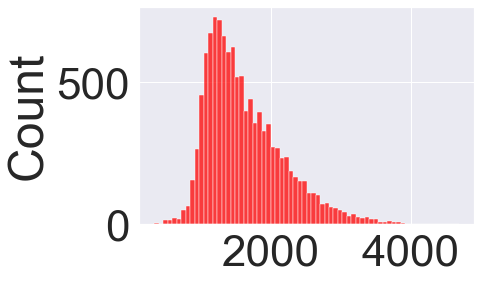

In [111]:
sns.histplot(model2_y_pred, color="red",)

### R² for both model 1(98%) and model 2(80%) is high. I will not proceed to find R² for individual states (as stated in problem statement)